# Macroeconomic analysis - figures and vizualization
* Responsible: Joakim Blix Prestmo
* Contributor: Haakon Trønnes
* Data sources: Statistics Norway, ECB, NAV, FED, Norges Bank mv. 
* Last update: 28th april 2021



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
# import pandas_datareader.data as web

pd.options.display.max_columns=250
pd.options.display.max_rows=250

%load_ext autoreload
%autoreload 2

C:\Users\jprestmo001\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4



## Changes
* No recent changes

In [2]:
sns.__version__, pd.__version__

('0.11.2', '1.3.4')

In [3]:
fixedprices = "2019-priser"
lastquarter = "2022Q2"

<h2>National accounts</h2>
Source: Statitics Norway

In [4]:
# Nasjonalregnskapet, faste priser, ses just og ujustert
dfses = pd.read_csv('http://data.ssb.no/api/v0/dataset/59022.csv?lang=no', encoding = 'latin1', na_values = '..', sep=";")
dfses  = dfses[dfses["statistikkvariabel"]=="Faste "+fixedprices+", sesongjustert (mill. kr)"]
dfses.drop('statistikkvariabel',1, inplace=True)
dfses['kvartal'] =pd.Series(dfses['kvartal']).str.replace('K', 'Q')
pd.to_datetime(dfses['kvartal'])
# # 
dfses = dfses.pivot(index = 'kvartal', columns = 'makrostørrelse', values = '09190: Makroøkonomiske hovedstørrelser, etter makrostørrelse, kvartal og statistikkvariabel')

dfses.columns = [dfses.columns.str.split(' ')[i][0] for i in range(len(dfses.columns))]
kolonnenavn = list(dfses.columns.values)

dfses.tail()

C:\Users\JPREST~1\AppData\Local\Temp/ipykernel_29524/3879490215.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfses.drop('statistikkvariabel',1, inplace=True)


,bif.nr8307,bif.nr8368,bif.nr83_6,bif.nr83_6fn,bif.nr83_6fnxof,bif.nr83indberg,bif.nr83naer,bif.nr83oljroer,bif.nr83rest,bif.nr83vare,bif.nr84_5,bif.nr8_,bif.pub8X50A,bil.nr8lu_,biv.nr0890,bnpb.nr23_6fn,bnpb.nr23_6fnxof,bnpb.nr23_9,bnpb.nr23_9fn,bnpb.nr23indberg,bnpb.nr23oljsj,bnpb.nr23ptjfn,bnpb.nr23vare,bnpb.nr24_5,bnpb.nr29korr,eks.nrskiplfly,eks.nrtjen,eks.nrtot,eks.nrtradvare,eks.puboljegs,imp.nrskiplfly,imp.nrtjen,imp.nrtot,imp.nrtradvare,imp.puboljegs,koh.nr61L8,koh.nr61L9,koh.nr61_,koh.nr61tjen,koh.nr61vare,koh.nrpriv,koi.nr66_,koo.nr6401,koo.nr64_,koo.nr64sivil,koo.nr65_,koo.nroff,makrok.nrefn,makrok.nreoff,makrok.nrianv,makrok.nrsanv
kvartal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021Q2,638,49014,223945,179765,132290,11829,83276,44046,50754,20056,47475,240782,135,16795,41,663610,491439,900515,764247,57423,136269,342364,91652,172172,100636,3082,79503,326251,112839,130827,5616,68098,270031,188380,7937,1354,-2367,356521,162899,194636,375086,18565,13495,111919,98424,116508,228427,783278,275902,844295,1170547
2021Q3,680,45714,220479,179084,126807,11184,81094,41248,53148,16083,52276,242500,147,21917,104,682598,505954,936779,786450,57539,150329,355217,93198,176644,103852,7704,87228,353036,113208,144896,10088,80388,288388,194879,3033,7497,-4612,376200,177617,195698,398056,21856,13522,113615,100093,117962,231577,808716,283853,872132,1225168
2021Q4,673,47707,227731,186457,132833,13517,85126,41000,54629,16307,53624,251220,274,23367,122,692657,514122,937914,798322,56909,139592,364999,92214,178535,105665,975,92957,338406,110537,133937,7931,93652,295018,189958,3478,16026,-8279,388824,186150,194927,411580,22756,13613,114982,101369,116744,231726,829763,285350,894526,1232932
2022Q1,736,48745,226838,188257,138596,13265,89851,38495,57211,18640,49661,265995,86,39053,104,691845,516188,929927,794978,56861,134949,365108,94219,175657,103133,912,93372,331061,107213,129565,7271,97903,297644,188896,3574,16202,-8547,380372,187081,185637,402263,21891,13617,111290,97673,116961,228251,818772,277912,896510,1227571
2022Q2,577,46879,224431,182768,133054,14179,86175,41467,54273,17146,49714,269034,196,44481,122,697172,519777,936532,800411,56351,136121,369778,93648,177395,103239,2196,99692,333956,104576,127492,5696,107660,310514,193486,3672,23038,-9369,392373,193293,185412,415275,22902,13574,112497,98923,116284,228781,826824,278495,913090,1247046


In [5]:
url = 'https://www.ssb.no/statbank/sq/10035447'
dfmnd = pd.read_excel(url, skiprows=3, skipfooter=51)

In [6]:
dfmnd.tail()

,Unnamed: 0,Konsum i husholdninger og ideelle organisasjoner,¬ Konsum i husholdninger,¬¬ Varekonsum,¬¬ Tjenestekonsum,¬¬ Husholdningenes kjøp i utlandet,¬¬ Utlendingers kjøp i Norge,¬ Konsum i ideelle organisasjoner,Konsum i offentlig forvaltning,¬ Konsum i statsforvaltningen,"¬¬¬ Konsum i statsforvaltningen, sivilt","¬¬¬ Konsum i statsforvaltningen, forsvar",¬ Konsum i kommuneforvaltningen,Bruttoinvestering i fast realkapital,¬ Utvinning og rørtransport (bruttoinvestering),¬ Utenriks sjøfart (bruttoinvestering),¬ Fastlands-Norge (bruttoinvestering),¬¬ Fastlands-Norge utenom offentlig forvaltning (bruttoinvestering),¬¬¬ Næringer (bruttoinvestering),¬¬¬¬ Tjenester tilknyttet utvinning (bruttoinvestering),¬¬¬¬ Andre tjenester (bruttoinvestering),¬¬¬¬ Industri og bergverk (bruttoinvestering),¬¬¬¬ Annen vareproduksjon (bruttoinvestering),¬¬¬ Boliger (husholdninger) (bruttoinvestering),¬¬¬ Offentlig forvaltning (bruttoinvestering),Anskaffelser minus avhendelse av verdigjenstander,Lagerendring og statistiske avvik,Bruttoinvestering i alt,Innenlandsk sluttanvendelse,Etterspørsel fra Fastlands-Norge (ekskl. lagerendring),Etterspørsel fra offentlig forvaltning,Eksport i alt,¬ Tradisjonelle varer (eksport),¬ Råolje og naturgass (eksport),"¬ Skip, plattformer og fly (eksport)",¬ Tjenester (eksport),Samlet sluttanvendelse,Import i alt,¬ Tradisjonelle varer (import),¬ Råolje og naturgass (import),"¬ Skip, plattformer og fly (import)",¬ Tjenester (import),"Bruttonasjonalprodukt, markedsverdi","Bruttonasjonalprodukt Fastlands-Norge, markedsverdi",Oljevirksomhet og utenriks sjøfart,"Bruttoprodukt Fastlands-Norge, basisverdi",¬ Fastlands-Norge utenom offentlig forvaltning (bruttoprodukt),¬¬ Industri og bergverk (bruttoprodukt),¬¬ Annen vareproduksjon (bruttoprodukt),¬¬ Tjenester inkl. boligtjenester (bruttoprodukt),¬ Offentlig forvaltning (bruttoprodukt),Produktavgifter og -subsidier
74,2022M03,136612,129164,62448,64050,5898,-3233,7448,75783,36946,32407,4539,38837,77627,13044,51,64532,47963,31231,257,19883,4535,6556,16732,16568,46,5949,83621,296016,276927,92352,116813,37174,47365,1083,31191,412829,100429,62563,1490,3030,33347,312400,267308,45092,232328,173900,18852,31992,123056,58428,34980
75,2022M04,137609,130146,61839,64121,7453,-3268,7463,75932,37184,32651,4533,38748,73562,13325,26,60211,43530,28080,197,17547,4810,5525,15450,16681,37,15879,89478,303019,273752,92612,110289,35423,41744,161,32960,413307,102147,64070,1204,1471,35402,311160,266173,44987,232035,173063,19286,30871,122906,58972,34138
76,2022M05,136634,129226,60981,63912,7457,-3124,7408,75907,37218,32681,4537,38689,74761,13412,110,61239,44460,28727,201,18143,4886,5497,15733,16779,41,15792,90594,303135,273780,92686,114559,35456,44603,1734,32767,417694,105177,65129,1424,2910,35715,312517,265823,46694,231797,172966,18674,31251,123040,58830,34026
77,2022M06,136995,129501,61041,63875,7863,-3278,7493,75897,37361,32847,4514,38536,74156,13063,58,61036,44239,28703,197,18114,4809,5582,15537,16796,43,17500,91699,304590,273927,92693,110722,34774,42215,395,33338,415312,104352,65558,1158,1407,36229,310960,266652,44309,232473,173708,18804,31611,123293,58765,34179
78,2022M07,134988,127471,59387,63477,8032,-3425,7517,75366,37341,32835,4506,38025,72965,12395,26,60543,43585,28280,208,17186,5411,5475,15304,16959,38,20333,93335,303689,270898,92325,111891,35788,43269,236,32598,415580,103656,65076,800,1385,36396,311924,265779,46145,232393,173996,19469,31702,122825,58397,33386


In [7]:
dfmnd.rename(columns={'Unnamed: 0':'Date', 'Konsum i husholdninger og ideelle organisasjoner': 'HouseholdConsumption', 'Konsum i offentlig forvaltning': 'PublicConsumption',
                     '¬¬¬ Næringer (bruttoinvestering)':'IndustryInvest', '¬ Utvinning og rørtransport (bruttoinvestering)': 'OilInvest', 
                     'Bruttonasjonalprodukt Fastlands-Norge, markedsverdi': 'GDPMainland'}, inplace=True)

# dfmnd.drop(['Dato'], axis=1, inplace=True)
dfmnd.index=dfmnd['Date']
dfmnd.drop(['Date'], axis=1, inplace=True)



In [8]:
# dfmnd.rename(columns={'Unnamed: 0':'Dato', 'Konsum i husholdninger og ideelle organisasjoner': 'HushKonsum', 'Konsum i offentlig forvaltning': 'OffKonsum',
#                      '¬¬¬ Næringer (bruttoinvestering)':'NaearingsInvest', '¬ Utvinning og rørtransport (bruttoinvestering)': 'OljeInvest', 
#                      'Bruttonasjonalprodukt Fastlands-Norge, markedsverdi': 'BNPFN'}, inplace=True)
# dfmnd.drop(['Dato'], axis=1, inplace=True)

In [9]:
# dfses.tail()
dfmnd.tail()

,HouseholdConsumption,¬ Konsum i husholdninger,¬¬ Varekonsum,¬¬ Tjenestekonsum,¬¬ Husholdningenes kjøp i utlandet,¬¬ Utlendingers kjøp i Norge,¬ Konsum i ideelle organisasjoner,PublicConsumption,¬ Konsum i statsforvaltningen,"¬¬¬ Konsum i statsforvaltningen, sivilt","¬¬¬ Konsum i statsforvaltningen, forsvar",¬ Konsum i kommuneforvaltningen,Bruttoinvestering i fast realkapital,OilInvest,¬ Utenriks sjøfart (bruttoinvestering),¬ Fastlands-Norge (bruttoinvestering),¬¬ Fastlands-Norge utenom offentlig forvaltning (bruttoinvestering),IndustryInvest,¬¬¬¬ Tjenester tilknyttet utvinning (bruttoinvestering),¬¬¬¬ Andre tjenester (bruttoinvestering),¬¬¬¬ Industri og bergverk (bruttoinvestering),¬¬¬¬ Annen vareproduksjon (bruttoinvestering),¬¬¬ Boliger (husholdninger) (bruttoinvestering),¬¬¬ Offentlig forvaltning (bruttoinvestering),Anskaffelser minus avhendelse av verdigjenstander,Lagerendring og statistiske avvik,Bruttoinvestering i alt,Innenlandsk sluttanvendelse,Etterspørsel fra Fastlands-Norge (ekskl. lagerendring),Etterspørsel fra offentlig forvaltning,Eksport i alt,¬ Tradisjonelle varer (eksport),¬ Råolje og naturgass (eksport),"¬ Skip, plattformer og fly (eksport)",¬ Tjenester (eksport),Samlet sluttanvendelse,Import i alt,¬ Tradisjonelle varer (import),¬ Råolje og naturgass (import),"¬ Skip, plattformer og fly (import)",¬ Tjenester (import),"Bruttonasjonalprodukt, markedsverdi",GDPMainland,Oljevirksomhet og utenriks sjøfart,"Bruttoprodukt Fastlands-Norge, basisverdi",¬ Fastlands-Norge utenom offentlig forvaltning (bruttoprodukt),¬¬ Industri og bergverk (bruttoprodukt),¬¬ Annen vareproduksjon (bruttoprodukt),¬¬ Tjenester inkl. boligtjenester (bruttoprodukt),¬ Offentlig forvaltning (bruttoprodukt),Produktavgifter og -subsidier
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022M03,136612,129164,62448,64050,5898,-3233,7448,75783,36946,32407,4539,38837,77627,13044,51,64532,47963,31231,257,19883,4535,6556,16732,16568,46,5949,83621,296016,276927,92352,116813,37174,47365,1083,31191,412829,100429,62563,1490,3030,33347,312400,267308,45092,232328,173900,18852,31992,123056,58428,34980
2022M04,137609,130146,61839,64121,7453,-3268,7463,75932,37184,32651,4533,38748,73562,13325,26,60211,43530,28080,197,17547,4810,5525,15450,16681,37,15879,89478,303019,273752,92612,110289,35423,41744,161,32960,413307,102147,64070,1204,1471,35402,311160,266173,44987,232035,173063,19286,30871,122906,58972,34138
2022M05,136634,129226,60981,63912,7457,-3124,7408,75907,37218,32681,4537,38689,74761,13412,110,61239,44460,28727,201,18143,4886,5497,15733,16779,41,15792,90594,303135,273780,92686,114559,35456,44603,1734,32767,417694,105177,65129,1424,2910,35715,312517,265823,46694,231797,172966,18674,31251,123040,58830,34026
2022M06,136995,129501,61041,63875,7863,-3278,7493,75897,37361,32847,4514,38536,74156,13063,58,61036,44239,28703,197,18114,4809,5582,15537,16796,43,17500,91699,304590,273927,92693,110722,34774,42215,395,33338,415312,104352,65558,1158,1407,36229,310960,266652,44309,232473,173708,18804,31611,123293,58765,34179
2022M07,134988,127471,59387,63477,8032,-3425,7517,75366,37341,32835,4506,38025,72965,12395,26,60543,43585,28280,208,17186,5411,5475,15304,16959,38,20333,93335,303689,270898,92325,111891,35788,43269,236,32598,415580,103656,65076,800,1385,36396,311924,265779,46145,232393,173996,19469,31702,122825,58397,33386


In [10]:
# pd.date_range(start='1/1/2000', end='30/09/2019', freq='Q')

In [11]:
# dfses.tail()

In [12]:
# date_rng
#  https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

In [13]:
# dfmnd.rename(columns={'Unnamed: 0':'Date', 'Konsum i husholdninger og ideelle organisasjoner': 'HouseholdConsumption', 'Konsum i offentlig forvaltning': 'PublicConsumption',
#                      '¬¬¬ Næringer (bruttoinvestering)':'IndustryInvest', '¬ Utvinning og rørtransport (bruttoinvestering)': 'OilInvest', 
#                      'Bruttonasjonalprodukt Fastlands-Norge, markedsverdi': 'GDPMainland'}, inplace=True)

# # dfmnd.drop(['Dato'], axis=1, inplace=True)
# dfmnd.index=dfmnd['Date']
# dfmnd.drop(['Date'], axis=1, inplace=True)


In [17]:
dfses.head()

,bif.nr8307,bif.nr8368,bif.nr83_6,bif.nr83_6fn,bif.nr83_6fnxof,bif.nr83indberg,bif.nr83naer,bif.nr83oljroer,bif.nr83rest,bif.nr83vare,bif.nr84_5,bif.nr8_,bif.pub8X50A,bil.nr8lu_,biv.nr0890,bnpb.nr23_6fn,bnpb.nr23_6fnxof,bnpb.nr23_9,bnpb.nr23_9fn,bnpb.nr23indberg,bnpb.nr23oljsj,bnpb.nr23ptjfn,bnpb.nr23vare,bnpb.nr24_5,bnpb.nr29korr,eks.nrskiplfly,eks.nrtjen,eks.nrtot,eks.nrtradvare,eks.puboljegs,imp.nrskiplfly,imp.nrtjen,imp.nrtot,imp.nrtradvare,imp.puboljegs,koh.nr61L8,koh.nr61L9,koh.nr61_,koh.nr61tjen,koh.nr61vare,koh.nrpriv,koi.nr66_,koo.nr6401,koo.nr64_,koo.nr64sivil,koo.nr65_,koo.nroff,makrok.nrefn,makrok.nreoff,makrok.nrianv,makrok.nrsanv
kvartal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000Q1,6628,26951,132305,95724,72363,8912,45040,26052,26816,8265,21683,169336,8944,37028,4,434060,309265,669888,490574,48445,171950,200699,60585,127153,58490,3862,58380,285004,74193,143709,17350,57786,165075,87912,2774,11000,-7094,218711,111791,103366,230895,12396,13534,55969,41979,97194,149728,474477,172472,553605,838606
2000Q2,476,26528,130333,97314,73426,9645,46420,24615,26917,8491,24044,157573,10879,27237,4,429850,307591,660214,486875,47642,165818,199115,60841,126730,58764,3346,58811,282108,74751,144061,15166,57824,162562,90109,2509,11208,-7244,222155,112559,105612,234774,12763,13298,54733,41344,96269,148321,478724,171687,543492,825598
2000Q3,828,27493,125081,96779,73040,8758,45412,22878,25603,7913,22667,153477,6809,28394,4,433538,308925,666622,491163,47863,168992,201481,59822,127243,59412,7399,57478,288935,72817,147662,11340,55976,159721,90324,3773,10649,-7128,222013,113332,104945,234768,13129,13106,54704,41397,96573,149162,478936,171149,539897,828829
2000Q4,517,28268,127486,98525,75253,8510,45542,22267,27075,7899,24371,151979,4421,24490,4,433255,309944,666884,492381,47591,170159,203318,58377,126690,60542,5835,64411,291705,75113,143761,7413,59278,159765,90339,3646,11364,-8563,220974,113793,104440,233358,12595,13174,55360,41838,96101,149607,482826,173562,537009,828710
2001Q1,1534,29353,131123,107191,79565,9255,52275,22401,29496,9807,24261,150185,7430,19059,4,441764,316691,674686,501943,47671,169325,207578,62120,126492,62162,5876,58870,297423,77375,151686,8748,61863,164702,92357,3104,10868,-7560,223656,113704,105439,236119,12437,13188,57092,43556,100658,155660,492101,179538,544028,841448


In [18]:


dfses['bnpb.nr23_9fn'].tail()

dfses['log_BNP'] = np.log(dfses['bnpb.nr23_9fn'])
dfses['Glog_BNP'] = dfses['log_BNP'].rolling(window=7, center=True).mean()
dfses['Dlog_BNP'] = (dfses['log_BNP']).diff()
dfses['D4log_BNP'] = dfses['log_BNP'].diff(4)
dfses['DBNP-trend'] = dfses['Dlog_BNP']['1998K1':lastquarter].mean()
dfses['GDlog_BNP'] = dfses['Dlog_BNP'].rolling(window=7, center=True).mean()
dfses['BNP-gap'] = (dfses['GDlog_BNP']/dfses['DBNP-trend']-1)

# dfses['Glog_BNP'] = dfses['log_BNP'].rolling(window=25).mean()



In [19]:
# import pickle
# dfses.to_pickle('../dfses.pkl')
# # dfses = pd.read_pickle('../dfses.pkl')

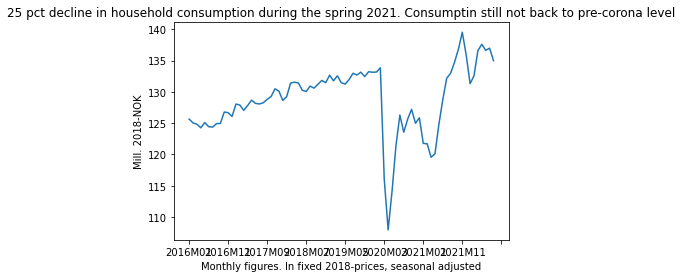

In [20]:
# Figur konsum i husholdningene, ses. just månedstall

(dfmnd['HouseholdConsumption']/1000).plot()
# dfmnd['OljeInvest'].plot()
# dfmnd['Offkonsum'].plot()
plt.title('25 pct decline in household consumption during the spring 2021. Consumptin still not back to pre-corona level')
# plt.rc('text', usetex=True)
plt.ylabel('Mill. 2018-NOK')
plt.xlabel('Monthly figures. In fixed 2018-prices, seasonal adjusted')
figfolder = 'Figures/Makro/'
plt.savefig('Figures/Makro/konsumMnd.png')
plt.show()

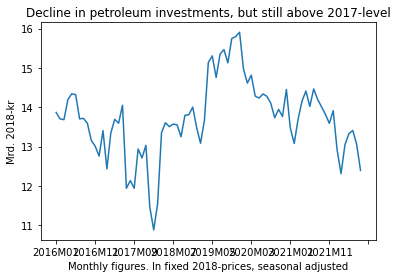

In [21]:
# Figur konsum i husholdningene, ses. just månedstall

(dfmnd['OilInvest']/1000).plot()
# dfmnd['OljeInvest'].plot()
# dfmnd['Offkonsum'].plot()
plt.title('Decline in petroleum investments, but still above 2017-level')
# plt.rc('text', usetex=True)
plt.ylabel('Mrd. 2018-kr')
plt.xlabel('Monthly figures. In fixed 2018-prices, seasonal adjusted')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder + '/oljeInvestMnd.png')
plt.show()

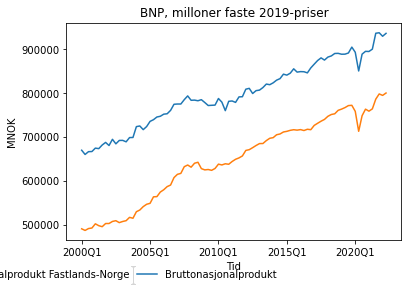

In [22]:
# 1.12 BNP sesjustert
#['2008K2':'2017K3']
plt.clf()
dfses['bnpb.nr23_9'].plot(label = 'Bruttonasjonalprodukt')
dfses['bnpb.nr23_9fn'].plot(label = 'Bruttonasjonalprodukt Fastlands-Norge')
# dfses['Glog_BNP'].plot()
# dfses['log_BNP'].plot()

plt.title('BNP, milloner faste '+fixedprices)
plt.ylabel('MNOK')
plt.xlabel("Tid")

plt.legend(bbox_to_anchor=(0.2, -0.2), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fancybox=True )
figfolder = 'Figures/Makro/'
plt.savefig(figfolder + '1.12 BNP.png')
plt.show()

#,bbox_inches="tight"

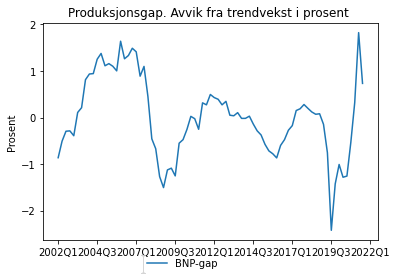

In [23]:


# 1.13 BNP sesjustert vekst

#dfses['Dlog_BNP']['2008K2':'2017K3'].plot(label = 'Bruttonasjonalprodukt Fastlands-Norge')
#dfses['GDlog_BNP']['2008K2':'2017K3'].plot(label='Trendvekst')
dfses['BNP-gap']['2002Q1':lastquarter].plot(label='BNP-gap')
plt.title('Produksjonsgap. Avvik fra trendvekst i prosent ')
plt.ylabel('Prosent')
plt.xlabel('')
plt.legend(bbox_to_anchor=(0.3, -0.15), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fancybox=True )
#plt.legend()
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'BNP-gap.png')
plt.show()




In [24]:
# kolonnenavn
dfses['andelOlje'] = dfses['bif.nr83oljroer'] / dfses['bnpb.nr23_9fn']



In [25]:
# dfses['andelOlje'].tail(50)

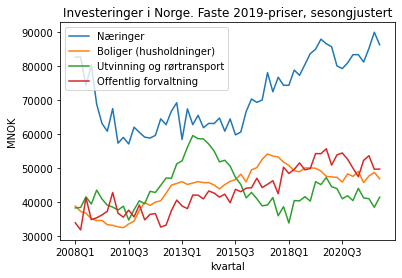

In [26]:
plt.clf()

#1.22 Investering
dfses['bif.nr83naer']['2008K2':lastquarter].plot(label = 'Næringer')
dfses['bif.nr8368']['2008K2':lastquarter].plot(label = 'Boliger (husholdninger)')
dfses['bif.nr83oljroer']['2008K2':lastquarter].plot(label = 'Utvinning og rørtransport')
# dfses['bif.nr83indberg']['2008K2':sistekvartal].plot(label = 'Industri') 
# dfses['bif.nr83rest']['2008K2':sistekvartal].plot(label = 'Andre tjenester') 
# dfses['bif.nr83vare']['2008K2':sistekvartal].plot(label = 'Annen vareproduksjon') 
dfses['bif.nr84_5']['2008K2':lastquarter].plot(label = 'Offentlig forvaltning')
plt.title('Investeringer i Norge. Faste '+fixedprices+', sesongjustert')
plt.ylabel('MNOK')
plt.legend()

figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'Investering.png')

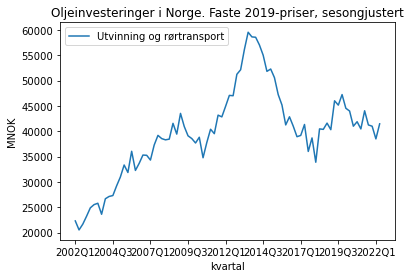

In [27]:
plt.clf()

#1.22 Investering
dfses['bif.nr83oljroer']['2002K2':lastquarter].plot(label = 'Utvinning og rørtransport')
# dfses['bif.nr83indberg']['2008K2':sistekvartal].plot(label = 'Industri') 
# dfses['bif.nr83rest']['2008K2':sistekvartal].plot(label = 'Andre tjenester') 
# dfses['bif.nr83vare']['2008K2':sistekvartal].plot(label = 'Annen vareproduksjon') 
plt.title('Oljeinvesteringer i Norge. Faste '+fixedprices+', sesongjustert')
plt.ylabel('MNOK')
plt.legend()

figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'Investering.png')

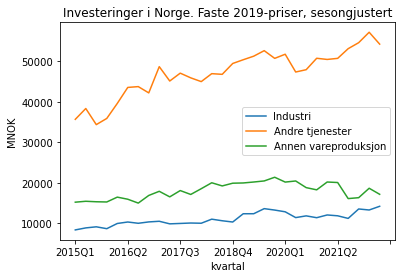

In [28]:
plt.clf()

#1.23 Andre investering
dfses['bif.nr83indberg']['2015K1':lastquarter].plot(label = 'Industri') 
dfses['bif.nr83rest']['2015K1':lastquarter].plot(label = 'Andre tjenester') 
dfses['bif.nr83vare']['2015K1':lastquarter].plot(label = 'Annen vareproduksjon') 
plt.title('Investeringer i Norge. Faste '+fixedprices+', sesongjustert')
plt.ylabel('MNOK')
plt.legend()
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'Andre ivestering.png')

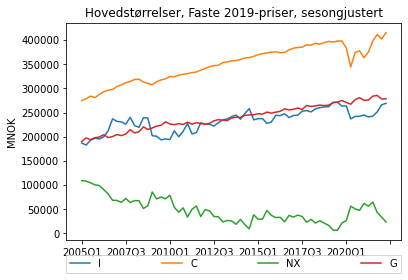

In [29]:
plt.clf()
#1.31 økosirk
#df['bnpb.nr23_9'].plot(label = 'Bruttonasjonalprodukt, markedsverdi')
#df['imp.nrtot'].plot(label = 'Im')#(label = 'Import i alt')
plt.clf()
dfses['bif.nr8_']['2005K3':lastquarter].plot(label = 'I')#(label = 'Bruttoinvestering i alt')
dfses['koh.nrpriv']['2005K3':lastquarter].plot(label = 'C')#(label = 'Konsum i husholdninger og ideelle organisasjoner')
(dfses['eks.nrtot']['2005K3':lastquarter]-dfses['imp.nrtot']['2005K3':lastquarter]).plot(label = 'NX')#(label = 'Eksport i alt')
dfses['makrok.nreoff']['2005K3':lastquarter].plot(label = 'G')#(label = 'Etterspørsel fra offentlig forvaltning')
plt.ylabel('MNOK')
plt.xlabel('')
#plt.legend()
plt.legend(bbox_to_anchor=(0., -0.15, 1, 0.25), loc=4,
           ncol=4, mode="expand", borderaxespad=0., fancybox=False )
plt.title("Hovedstørrelser, Faste "+fixedprices+", sesongjustert")
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'Økosirk.png')


In [30]:
# vekst fra forrige kvartal
DI = np.log(dfses['bif.nr8_']).diff()*100
DC = np.log(dfses['koh.nrpriv']).diff()*100
DX = np.log(dfses['eks.nrtot']).diff()*100
DNX = np.log(dfses['eks.nrtot']-dfses['imp.nrtot']+5000).diff()
D4G = np.log(dfses['makrok.nreoff']).diff(4)*25
D4I = np.log(dfses['bif.nr8_']).diff(4)*25
D4C = np.log(dfses['koh.nrpriv']).diff(4)*25

I_index = dfses['bif.nr8_']/dfses['bif.nr8_']['2019Q1']
C_index = dfses['koh.nrpriv']/dfses['koh.nrpriv']['2019Q1']
NX_index = (dfses['eks.nrtot']-dfses['imp.nrtot'])/(dfses['eks.nrtot']['2019Q1']-dfses['imp.nrtot']['2019Q1'])
G_index = dfses['makrok.nreoff']/dfses['makrok.nreoff']['2019Q1']
X_index = dfses['eks.nrtot']/dfses['eks.nrtot']['2019Q1']



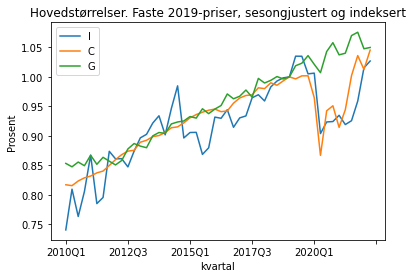

In [31]:
#1.32 økosirk - indeksert
#df['bnpb.nr23_9'].plot(label = 'Bruttonasjonalprodukt, markedsverdi')
#df['imp.nrtot'].plot(label = 'Im')#(label = 'Import i alt')
I_index['2010Q1':].plot(label = 'I')#(label = 'Bruttoinvestering i alt')
C_index['2010Q':].plot(label = 'C')#(label = 'Konsum i husholdninger og ideelle organisasjoner')
# X_index['2010Q':].plot(label = 'X')#(label = 'Eksport i alt')
# NX_index['2010Q':].plot(label = 'NX')#(label = 'Eksport i alt')
G_index['2010K1':].plot(label = 'G')#(label = 'Etterspørsel fra offentlig forvaltning')
plt.ylabel('Prosent')
plt.title('Hovedstørrelser. Faste '+fixedprices+', sesongjustert og indeksert')
plt.legend()
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'Økosirk2.png')


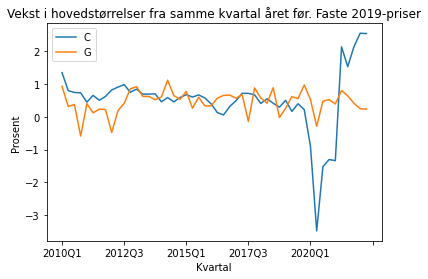

In [32]:
plt.clf()
#1.32 økosirk - vekst
#df['bnpb.nr23_9'].plot(label = 'Bruttonasjonalprodukt, markedsverdi')
#df['imp.nrtot'].plot(label = 'Im')#(label = 'Import i alt')
# D4I['2012Q1':sistekvartal].plot(label = 'I')#(label = 'Bruttoinvestering i alt')
D4C['2010Q1':lastquarter].plot(label = 'C')#(label = 'Konsum i husholdninger og ideelle organisasjoner')
# DNX['2010K1':sistekvartal].plot(label = 'NX')#(label = 'Eksport i alt')
D4G['2010Q1':lastquarter].plot(label = 'G')#(label = 'Etterspørsel fra offentlig forvaltning')
plt.ylabel('Prosent')
plt.xlabel('Kvartal')
plt.title('Vekst i hovedstørrelser fra samme kvartal året før. Faste '+fixedprices+'')
plt.legend()
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +' Økosirk vekst.png')


In [33]:
plt.clf()

#1 makrodata fra nasjonalregnskapet
df = pd.read_csv('http://data.ssb.no/api/v0/dataset/59012.csv?lang=en', encoding = 'latin1', na_values = '..')
df = df[df['contents'] == 'Current prices, seasonally adjusted (NOK million)']
df.drop('contents',1, inplace =True)
df = df.pivot(index = 'quarter',columns = 'macroeconomic indicator', values = '09190: Final expenditure and gross domestic product, by macroeconomic indicator, contents and quarter')
df.columns = [df.columns.str.split(' ')[i][0] for i in range(len(df.columns))]

df.head()

C:\Users\JPREST~1\AppData\Local\Temp/ipykernel_29524/1218247947.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('contents',1, inplace =True)


,bif.nr8307,bif.nr8368,bif.nr83_6,bif.nr83_6fn,bif.nr83_6fnxof,bif.nr83indberg,bif.nr83naer,bif.nr83oljroer,bif.nr83rest,bif.nr83vare,bif.nr84_5,bif.nr8_,bif.pub8X50A,bil.nr8lu_,biv.nr0890,bnpb.nr23_6fn,bnpb.nr23_6fnxof,bnpb.nr23_9,bnpb.nr23_9fn,bnpb.nr23indberg,bnpb.nr23oljsj,bnpb.nr23ptjfn,bnpb.nr23vare,bnpb.nr24_5,bnpb.nr29korr,eks.nrskiplfly,eks.nrtjen,eks.nrtot,eks.nrtradvare,eks.puboljegs,imp.nrskiplfly,imp.nrtjen,imp.nrtot,imp.nrtradvare,imp.puboljegs,koh.nr61L8,koh.nr61L9,koh.nr61_,koh.nr61tjen,koh.nr61vare,koh.nrpriv,koi.nr66_,koo.nr6401,koo.nr64_,koo.nr64sivil,koo.nr65_,koo.nroff,makrok.nrefn,makrok.nreoff,makrok.nrianv,makrok.nrsanv
quarter,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000K1,3331.0,11613.0,77899.0,57196.0,44682.0,6211.0,33069.0,14891.0,18780.0,4748.0,12514.0,81592.0,5812.0,3693.0,27.0,237286.0,180710.0,360266.0,280357.0,33144.0,79909.0,121741.0,25825.0,56576.0,43071.0,1901.0,36152.0,157552.0,46452.0,73047.0,10729.0,32823.0,107344.0,62457.0,1335.0,6858.0,-4410.0,151804.0,66196.0,83160.0,158146.0,6342.0,6970.0,27528.0,20558.0,42766.0,70294.0,285636.0,82808.0,310058.0,467584.0
2000K2,337.0,11635.0,76499.0,55735.0,42280.0,6158.0,30646.0,14492.0,19200.0,4952.0,13455.0,83259.0,6272.0,6760.0,27.0,238842.0,183129.0,368662.0,283439.0,34011.0,85222.0,122538.0,26580.0,55713.0,44597.0,2227.0,39561.0,164042.0,48976.0,73277.0,7642.0,34951.0,109037.0,65281.0,1163.0,7176.0,-4566.0,153496.0,67066.0,83820.0,160050.0,6553.0,6958.0,27798.0,20840.0,42524.0,70321.0,286107.0,83776.0,313657.0,477672.0
2000K3,328.0,12010.0,72631.0,54656.0,41757.0,5823.0,29747.0,13824.0,18806.0,4791.0,12899.0,82123.0,4151.0,9492.0,27.0,242973.0,185392.0,383176.0,287612.0,34634.0,95564.0,125518.0,25239.0,57581.0,44639.0,3663.0,40299.0,177760.0,49670.0,84127.0,6766.0,34256.0,109372.0,66546.0,1803.0,6743.0,-4600.0,154383.0,68249.0,83990.0,161096.0,6714.0,7001.0,27922.0,20921.0,43620.0,71541.0,287294.0,84440.0,314788.0,492521.0
2000K4,335.0,12532.0,72440.0,55743.0,42904.0,5335.0,30373.0,13850.0,19825.0,4877.0,12838.0,82960.0,2847.0,10520.0,27.0,246954.0,188799.0,395011.0,292483.0,34199.0,102528.0,128204.0,26397.0,58155.0,45530.0,3364.0,43571.0,188752.0,51936.0,89881.0,4202.0,36695.0,110423.0,67639.0,1888.0,7185.0,-5455.0,154683.0,69231.0,83722.0,161188.0,6505.0,7125.0,28510.0,21385.0,43998.0,72508.0,289438.0,85346.0,316683.0,505407.0
2001K1,777.0,13363.0,79944.0,60638.0,46621.0,6337.0,33258.0,14112.0,20641.0,5503.0,14016.0,80540.0,5194.0,596.0,28.0,255350.0,194492.0,391943.0,301798.0,35487.0,90146.0,131858.0,27147.0,60858.0,46448.0,3449.0,44535.0,183707.0,51565.0,84158.0,6185.0,37744.0,114848.0,69332.0,1587.0,6888.0,-4854.0,158353.0,70269.0,86050.0,165051.0,6699.0,7225.0,29633.0,22408.0,47834.0,77466.0,303156.0,91483.0,323085.0,506765.0


<Figure size 432x288 with 0 Axes>

<h3>Household income</h3> 
<ul>
    <li>Natinal accounts/Income statistics</li>
</ul>

In [34]:
url = 'https://www.ssb.no/statbank/sq/10027772'
df=pd.read_excel(url, skiprows=4, skipfooter=47)
df.index = pd.date_range(start='1/1/2002', end='30/06/2022', freq='Q')
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [35]:
df.tail(6)
# df.head()

,Inntekter og utgifter. Sesongjustert (mill kr)
2021-03-31,406565
2021-06-30,412919
2021-09-30,408740
2021-12-31,480418
2022-03-31,433914
2022-06-30,438790


In [36]:
df['Vekst i disponible inntekter'] = np.log(df['Inntekter og utgifter. Sesongjustert (mill kr)']).diff()*100
df['Vekst i disponible inntekter fra året før'] = np.log(df['Inntekter og utgifter. Sesongjustert (mill kr)']).diff(4)*100


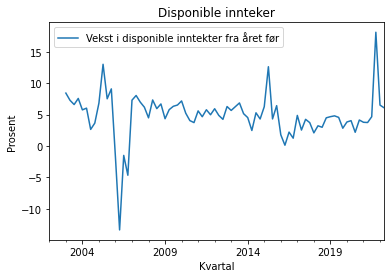

In [37]:
# Fig xx
# df['Disponible inntekter'] = df['Inntekter og utgifter. Sesongjustert (mill kr)']
df['Vekst i disponible inntekter fra året før'].plot()
plt.ylabel('Prosent')
plt.xlabel('Kvartal')
plt.title('Disponible innteker')
plt.legend()
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'Disp inntekt.png')

<h3>Varekonsumindeksen</h3>

In [38]:
# 1B Varekosumindeksen
url = 'http://www.ssb.no/statbank/sq/10025289/'
df_vki = pd.read_excel(url, skiprows=3, skipfooter=50)

In [39]:
df_vki.index = pd.date_range(start='1/1/2000', end='31/08/2022', freq='M')
# df_vki.drop(df_vki['Unnamed: 0'], axis=1)

df_vki.tail()

,Unnamed: 0,Totalt varekonsum
2022-04-30,2022M04,146.3
2022-05-31,2022M05,144.3
2022-06-30,2022M06,144.2
2022-07-31,2022M07,140.3
2022-08-31,2022M08,142.2


<AxesSubplot:>

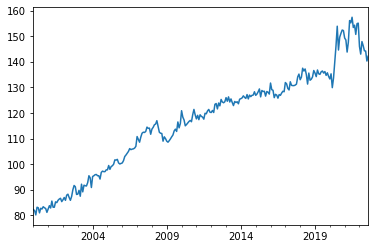

In [45]:
df_vki['Totalt varekonsum'].plot()

<h2>Money market rates and policy rates</h2>

In [46]:
# Money market rates
url = 'https://www.ssb.no/statbank/sq/10033602'
df_nibor = pd.read_excel(url, skiprows=3, skipfooter=56)
df_nibor.rename(columns={'Unnamed: 0':'Dato'}, inplace=True)
# df_nibor.index = df_nibor.Dato
# df_nibor.drop(['Dato'], axis=1, inplace=True)
df_nibor.rename(columns = {'NIBOR (3 mnd. effektiv)': 'Nibor 3M', 'Norges Banks foliorente (styringsrenten)':'FOLIO'}, inplace=True)

In [47]:
# Endrer dato til string - bruker str.replace for å erstatte M med -, kan deretter endre til datetime
df_nibor['DatoM'] = df_nibor['Dato'].astype('category')
df_nibor['DatoM'] = df_nibor['DatoM'].str.replace('M', '-')                     
df_nibor['date']=pd.to_datetime(df_nibor['DatoM']).dt.to_period('M')

In [48]:
df_nibor.index = df_nibor.date
df_nibor.drop(['DatoM', 'date', 'Dato'], axis=1, inplace=True)

In [49]:
df_nibor.tail()

,Nibor 3M,FOLIO
date,,
2022-04,1.29,0.75
2022-05,1.26,0.75
2022-06,1.71,1.25
2022-07,2.29,1.25
2022-08,2.66,1.75


In [50]:
# df['FOLIO'].head(10)

In [51]:
df_nibor.to_pickle('../dfnibor.pkl')

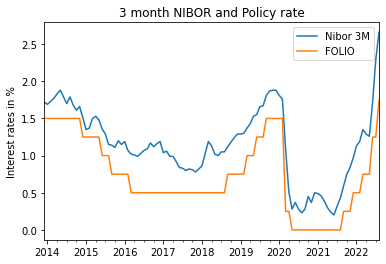

In [52]:

df_nibor.plot()
plt.title('3 month NIBOR and Policy rate')
plt.ylabel('Interest rates in %')
plt.xlabel("")
plt.savefig('2.0 NIBOR.png')

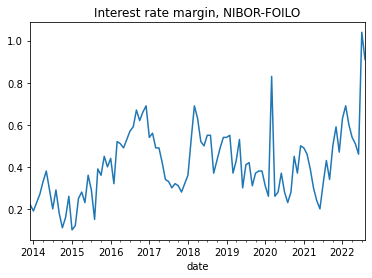

In [53]:
# Interest rate margin
plt.clf()
plt.title("Interest rate margin, NIBOR-FOILO")
df_nibor["MARGIN"]=df_nibor["Nibor 3M"]-df_nibor["FOLIO"]


df_nibor["MARGIN"].plot()
#df['FOLIO'].plot()
plt.savefig('../Figurer/Makro/2.2 Rentemargin.png')
plt.show()


<h2> Mortgage loan rates </h2>
<p> Average over Norwegian Banks <br>
Source: Statistics Norway </p>


In [54]:
# 10738: Renter på nye nedbetalingslån, etter utlånstype, sektor og bindingstid. Utvalg av banker og kredittforetak (prosent)
url = 'https://www.ssb.no/statbank/sq/10033653'
df_renter = pd.read_excel(url, skiprows=4, skipfooter=49)
df_renter.rename(columns = {'Unnamed: 0':'Date', 'Nedbetalingslån med pant i bolig':'Mortgage loan rates'}, inplace=True)

# Uncomment hvis en skal lage figur med dato (eller plasser etter endring til datetime)
# df_renter.index = df_renter.Dato
# df_renter.drop(columns=['Dato'], inplace=True)

In [55]:
# Endrer dato til string - bruker str.replace for å erstatte M med -, kan deretter endre til datetime
df_renter['DatoM'] = df_renter['Date'].astype('category')
df_renter['DatoM'] = df_renter['DatoM'].str.replace('M', '-')                     
# Endrer til DateTime og periode ÅÅÅÅ-MM:
df_renter['date']=pd.to_datetime(df_renter['DatoM']).dt.to_period('M')


df_renter.index = df_renter.date
df_renter.drop(columns=['Date','date', 'DatoM'], inplace=True)

In [56]:
df_renter.head()

,Mortgage loan rates
date,
2013-12,4.05
2014-01,4.04
2014-02,4.03
2014-03,4.02
2014-04,4.01


In [57]:
print(df_renter.head(), df_renter.tail())

         Mortgage loan rates
date                        
2013-12                 4.05
2014-01                 4.04
2014-02                 4.03
2014-03                 4.02
2014-04                 4.01          Mortgage loan rates
date                        
2022-04                 2.19
2022-05                 2.38
2022-06                 2.38
2022-07                 2.41
2022-08                 2.82


<AxesSubplot:xlabel='date'>

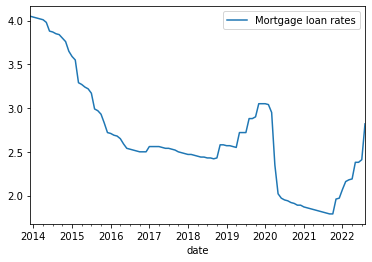

In [58]:
df_renter.plot()

In [59]:
# Merge data: Nibor/policy rate and mortgage rates

df_renters = df_nibor.merge(df_renter, left_on='date', right_on='date')


In [60]:
# df_renters

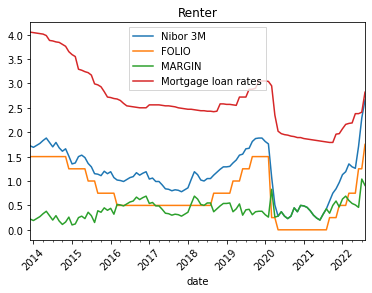

In [61]:
df_renters.plot()
plt.xticks(rotation=45)

# plt.xlabel(rotate='45')
plt.title('Renter')
plt.legend( fancybox=False )
plt.savefig('../Figurer/Makro/renter.png')
plt.show()

In [62]:
df_renters.corr()
df_renters.head()

,Nibor 3M,FOLIO,MARGIN,Mortgage loan rates
date,,,,
2013-12,1.72,1.5,0.22,4.05
2014-01,1.69,1.5,0.19,4.04
2014-02,1.73,1.5,0.23,4.03
2014-03,1.77,1.5,0.27,4.02
2014-04,1.83,1.5,0.33,4.01


# Credit markets
* https://www.ssb.no/kredind

In [63]:
url = 'https://www.ssb.no/statbank/sq/10042059'  # sesongjusterte tall
# url = 'https://www.ssb.no/statbank/sq/10046976'  # ujusterte tall

In [64]:
df_k2 = pd.read_excel(url, skiprows=350, skipfooter=52, header=None, names = ['date', 'households', 'companies'])

df_k2.index = df_k2['date']
df_k2.drop(['date'], axis= 1, inplace=True)

df_k2['Dlog_K2'] = np.log(df_k2['households']).diff()*100
df_k2['Dlog_K2_12'] = np.log(df_k2['households']).diff(12)*100


In [65]:
df_k2.tail(5)
# df_k2.head()

,households,companies,Dlog_K2,Dlog_K2_12
date,,,,
2022M04,2055859,4045856,0.611440,5.129537
2022M05,2078649,4060254,1.102440,5.455657
2022M06,2109040,4074538,1.451470,6.919068
2022M07,2111893,4089233,0.135183,6.830321
2022M08,2144676,4101610,1.540379,7.617181


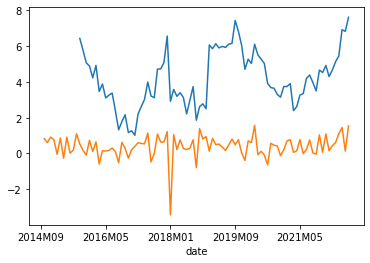

In [66]:
df_k2['Dlog_K2_12'].plot()
df_k2['Dlog_K2'].plot()
plt.show()


<h2>Konsumpriser</h2>

In [67]:
# KPI og KPI-JAE 
url= 'http://www.ssb.no/statbank/sq/10017630/'

kpi_df = pd.read_excel(url, skiprows=220, skipfooter=47, header=None, names=['Dato', 'KPI', 'KPI-JAE'])
# header = kpi_df.iloc[0]

# header[0]='Dato'
# header[1]='KPI'
# header[2] = 'KPI-JAE'
# # kpi_df = kpi_df[1:] #take the data less the header row
# kpi_df.columns = header

kpi_df.index=kpi_df['Dato']
kpi_df.drop(['Dato'], axis=1, inplace=True)

kpi_df['Dlog_KPI'] = np.log(kpi_df['KPI']).diff()
kpi_df['Dlog_KPI-JAE'] = np.log(kpi_df['KPI-JAE']).diff()
# .astype('int')


#  df.rename(index=str, columns={"A": "a", "B": "c"})

In [68]:
kpi_df['KPI'].dtype

dtype('float64')

In [69]:
kpi_df.tail()

,KPI,KPI-JAE,Dlog_KPI,Dlog_KPI-JAE
Dato,,,,
2022M04,121.1,116.5,0.007460,0.004301
2022M05,121.7,117.1,0.004942,0.005137
2022M06,122.5,117.6,0.006552,0.004261
2022M07,123.4,118.5,0.007320,0.007624
2022M08,123.9,118.7,0.004044,0.001686


In [70]:
kpi_df['log_KPI'] = np.log(kpi_df['KPI'].astype('float'))
kpi_df['log_KPI-JAE'] = np.log(kpi_df['KPI-JAE'].astype('float'))

kpi_df['Dlog_KPI'] = kpi_df['log_KPI'].diff()
kpi_df['Dlog_KPI-JAE'] = kpi_df['log_KPI-JAE'].diff()

kpi_df['DKPI'] = kpi_df['Dlog_KPI']*100
kpi_df['DKPI-JAE'] = kpi_df['Dlog_KPI-JAE']*100

In [71]:
# header
kpi_df.tail()

,KPI,KPI-JAE,Dlog_KPI,Dlog_KPI-JAE,log_KPI,log_KPI-JAE,DKPI,DKPI-JAE
Dato,,,,,,,,
2022M04,121.1,116.5,0.007460,0.004301,4.796617,4.757891,0.745963,0.430108
2022M05,121.7,117.1,0.004942,0.005137,4.801559,4.763028,0.494235,0.513700
2022M06,122.5,117.6,0.006552,0.004261,4.808111,4.767289,0.655203,0.426076
2022M07,123.4,118.5,0.007320,0.007624,4.815431,4.774913,0.732008,0.762393
2022M08,123.9,118.7,0.004044,0.001686,4.819475,4.776599,0.404368,0.168634


In [72]:
kpi_df['KPI-JAE, Trend']=kpi_df['DKPI-JAE'].rolling(window=3).mean()
kpi_df['KPI, Trend']=kpi_df['DKPI'].rolling(window=3).mean()


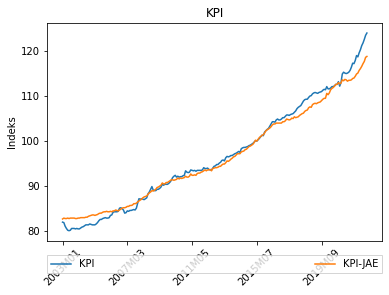

In [73]:
import datetime
now = datetime.datetime.now()

plt.clf()

# print("Current date and time using str method of datetime object")
# print(str(now))
# print("Current date and time using strftime")
# today=now.strftime("%Y-%d-%m")
# print(today)

kpi_df['KPI'].plot()
kpi_df['KPI-JAE'].plot()
plt.title('KPI')
plt.ylabel('Indeks')
plt.xticks(rotation=45)
plt.xlabel("")
plt.legend(bbox_to_anchor=(0., -0.15, 1, 0.25), loc=4,
           ncol=4, mode="expand", borderaxespad=0., fancybox=False )
# plt.savefig('../Figurer/Makro/KPI.png')
plt.show()


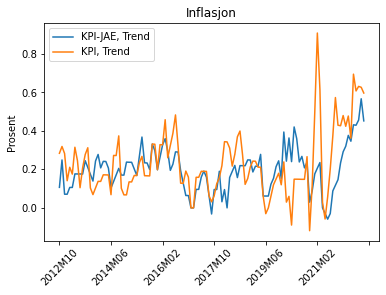

In [74]:
# kpi_df['DKPI']['2012M10':].plot()
kpi_df['KPI-JAE, Trend']['2012M10':].plot()
kpi_df['KPI, Trend']['2012M10':].plot()
plt.title('Inflasjon')
plt.ylabel('Prosent')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel("")
# plt.legend(bbox_to_anchor=(0., -0.15, 1, 0.25), loc=4,
#            ncol=4, mode="expand", borderaxespad=0., fancybox=False )
# plt.savefig('../Figurer/Makro/DKPI.png')
plt.show()


In [75]:
df.to_pickle('../df_nibor.pkl')

In [76]:
start= 'StartPeriod=2014'
url = 'https://data.norges-bank.no/api/data/EXR/B.USD+GBP+EUR.NOK.SP?'+start+'&format=csv-:-comma-true-y'

col_names = ['Dato','EURNOK', 'GBPNOK','USDNOK' ]
df = pd.read_csv(url, sep = ',', names=col_names, header=None)

df = df[9:]
# pd.to_numeric(df['EURNOK'], errors='ignore')

pd.to_datetime(df['Dato'])
df.index=df['Dato']
df.drop(['Dato'], axis=1, inplace=True)

# valuta=['GBPNOK','EURNOK','USDNOK']
# df[valuta].astype('float64', copy=True)
df = df.apply(pd.to_numeric, errors='coerce')

df.apply(pd.to_numeric, errors='coerce').dtypes


EURNOK    float64
GBPNOK    float64
USDNOK    float64
dtype: object

In [78]:
df.tail()

,EURNOK,GBPNOK,USDNOK
Dato,,,
2022-09-28,10.4576,11.5851,10.9332
2022-09-29,10.4518,11.6799,10.7684
2022-09-30,10.5838,11.9862,10.8574
2022-10-03,10.5655,12.1345,10.8209
2022-10-04,10.4915,12.0215,10.6071


In [79]:
df.to_pickle('../dfvalutaEur.pkl')


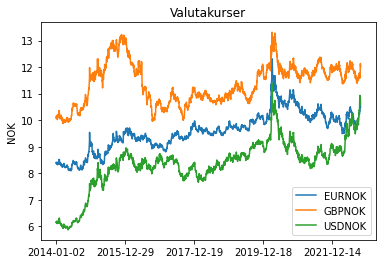

In [80]:
#3 valuta (jeg lager to plot fra denne kategorien for tilpasse størrelsesorden)

df.plot()
plt.xlabel('')
plt.ylabel('NOK')
plt.title('Valutakurser')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'valuta.png')


In [81]:
df.head()

,EURNOK,GBPNOK,USDNOK
Dato,,,
2014-01-02,8.4025,10.1455,6.1521
2014-01-03,8.3585,10.0650,6.1306
2014-01-06,8.3900,10.1048,6.1682
2014-01-07,8.3850,10.0884,6.1469
2014-01-08,8.4110,10.1619,6.1873


In [82]:
start= 'StartPeriod=2014'
valutaer = 'SEK+TWI+I44'

url = 'https://data.norges-bank.no/api/data/EXR/B.'+valutaer+'.NOK.SP?'+start+'&format=csv-:-comma-true-y'


StartPeriod=2011


col_names = ['Dato', 'I44','SEK','KKI' ]



In [83]:
df = pd.read_csv(url, sep = ',' , names=col_names, header=None)

df = df[9:]

pd.to_datetime(df['Dato'])
df.index=df['Dato']
df.drop(['Dato'], axis=1, inplace=True)

valutaer = ['SEK','KKI','I44' ]
df[valutaer].astype('float64', copy=True)
df = df.apply(pd.to_numeric, errors='coerce')

df.apply(pd.to_numeric, errors='coerce').dtypes

I44    float64
SEK    float64
KKI    float64
dtype: object

In [84]:
# df.head()

<Figure size 432x288 with 0 Axes>

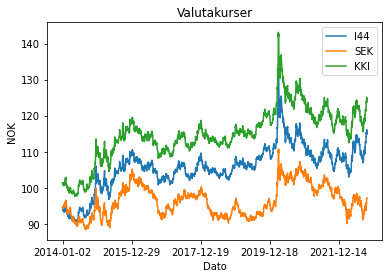

In [85]:
plt.clf()
#3.2 valuta
df.plot()
plt.ylabel('NOK')
plt.title('Valutakurser')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'valuta_i44.png')


In [86]:
plt.clf()
#4 ledighet
dfaku = pd.read_csv('http://data.ssb.no/api/v0/dataset/1054.csv?lang=en', names = ['sex', 'age', 'time', 'contents','value'], header = 0,na_values='..')

# #cleaning
# for i in range(len(dfaku['value'])):
#     #df['value'][i] = str(df['value'][i]).replace(',', '.') #change decimalpoint from ',' to '.'
#     dfaku['value'][i] = str(dfaku['value'][i]).replace('..','NaN') # change '..' to 'NaN'
#     if dfaku['value'][i] == '.' or dfaku['value'][i] == '0':# find missing values as replace with 'NaN'
#         dfaku['value'][i] = 'NaN'
        
        
series = pd.Series(dfaku['value'].astype(np.float64))
series.index = [dfaku[dfaku.columns[i]] for i in range(4)]
l = series.index.levels

# series[l[0][0], l[1][1], l[2][14]].plot()
# plt.xlabel('Dato')
# plt.ylabel('Ledighet i %')
# plt.title('Ledighet for 15-74 år')
# figfolder = 'Figures/Makro/'
# plt.savefig(figfolder +'ledighet.png')




<Figure size 432x288 with 0 Axes>

In [87]:
dfaku.head()

,sex,age,time,contents,value
0,0 Both sexes,15-74 15-74 years,2006M02,"Labour force, seasonally adjusted (1 000 persons)",2439.0
1,0 Both sexes,15-74 15-74 years,2006M02,"Total employment (1 000 persons), seasonally a...",2338.0
2,0 Both sexes,15-74 15-74 years,2006M02,"Man-weeks worked of 37.5 hours, seasonally adj...",1791.0
3,0 Both sexes,15-74 15-74 years,2006M02,"Unemployment (LFS) (1 000 persons), seasonally...",101.0
4,0 Both sexes,15-74 15-74 years,2006M02,"Unemployment rate (LFS), seasonally adjusted",4.2


In [88]:
dfaku.to_pickle('../dfaku.pkl')


In [89]:
df_ = dfaku[dfaku['contents']=='Unemployment rate (LFS), seasonally adjusted']
df__ = df_[df_['age']=='15-74 15-74 years']
df_ = df__[df__['sex']=='0 Both sexes']



In [90]:
df_.head()

,sex,age,time,contents,value
4,0 Both sexes,15-74 15-74 years,2006M02,"Unemployment rate (LFS), seasonally adjusted",4.2
12,0 Both sexes,15-74 15-74 years,2006M03,"Unemployment rate (LFS), seasonally adjusted",4.1
20,0 Both sexes,15-74 15-74 years,2006M04,"Unemployment rate (LFS), seasonally adjusted",3.9
28,0 Both sexes,15-74 15-74 years,2006M05,"Unemployment rate (LFS), seasonally adjusted",3.9
36,0 Both sexes,15-74 15-74 years,2006M06,"Unemployment rate (LFS), seasonally adjusted",3.7


In [91]:
df_aku = df_['value'].astype('float')
df_aku.index = pd.date_range(start='28/02/2006', end='31/07/2022', freq='M')

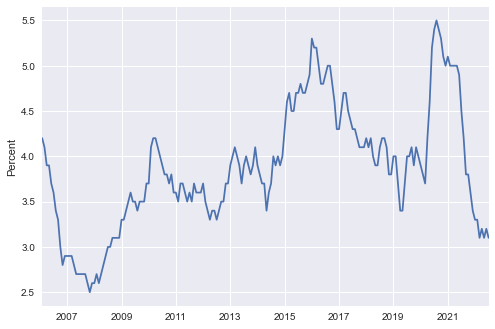

In [92]:
plt.style.use('seaborn')
df_aku['2006':].plot()
plt.ylabel('Percent')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'Unemployment.png')
plt.show()
plt.style.use('default')

In [93]:
# Ledige stillinger
# url=http://www.ssb.no/statbank/sq/10017461/
    
    

In [107]:
# Dagpengemottakere
# https://www.nav.no/no/nav-og-samfunn/statistikk/flere-statistikkomrader/relatert-informasjon/soknader-om-dagpenger
# url = 'https://www.nav.no/_/attachment/download/c7c4abe6-f040-4014-93f3-eea1145f1bf2:d306a7f2712590e637d9e463f82edc31d12fd4d5/200421%20S%C3%B8knader_om_dagpenger_2021_uke_15.xlsx'
url = 'https://www.nav.no/_/attachment/download/9a8167dd-2c3a-49e9-afef-fe44f3b7ddff:8829d5252d9862f735fc36659c3b9bebe19372e3/24.01.22%20S%C3%B8knader%20om%20dagpenger%20Uke3.xlsx'
# næringser 
# url = 'https://www.nav.no/no/nav-og-samfunn/statistikk/flere-statistikkomrader/relatert-informasjon/soknader-om-dagpenger/_/attachment/download/45180f2d-4445-4f83-834e-5d8c95d2bf90:120845241b1ca3a76ab8d6b47559f543a743e4f8/2503%20-%20S%C3%B8knader_om_dagpenger._N%C3%A6ring.xlsx'
df_adpm = pd.read_excel(url, sheet_name='Tidsserie uke', skiprows=7, header=None)
df_adpm.drop(columns =[0, 3,6, 7, 8,9 ,10, 11, 12], inplace=True)
df_adpm.columns=['Date', 'Applications', 'Unemployed', 'Redundants']

df_adpm.index=df_adpm['Date']
df_adpm.drop(columns=['Date'], inplace=True)


/home/joakim/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [109]:
df_adpm.head()

,Applications,Unemployed,Redundants
Date,,,
202203,3892,2580,1312
202202,4572,2751,1821
202201,6747,3692,3055
202152,4819,2393,2426
202151,6538,2431,4107


In [110]:
df_adpm.sort_values('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

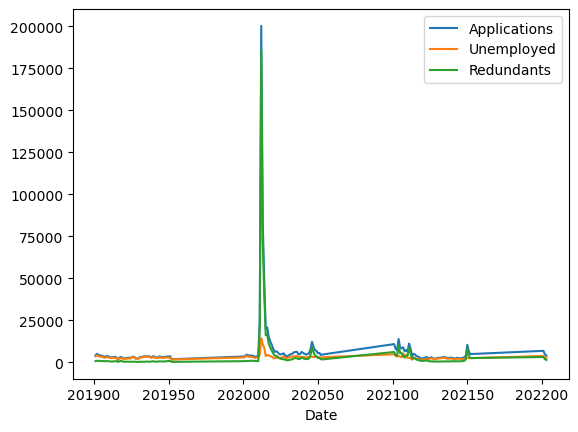

In [111]:
df_adpm.plot()

In [112]:
df_adpm['Sum Redundants'] = df_adpm['Redundants'].cumsum()
df_adpm['Sum Unemployed'] = df_adpm['Unemployed'].cumsum()
df_adpm['Sum applicants'] = df_adpm['Sum Redundants']+ df_adpm['Sum Unemployed']

In [113]:
df_adpm.head()

,Applications,Unemployed,Redundants,Sum Redundants,Sum Unemployed,Sum applicants
Date,,,,,,
201901,4133,3499,634,634,3499,4133
201902,4927,4091,836,1470,7590,9060
201903,4247,3514,733,2203,11104,13307
201904,4037,3286,751,2954,14390,17344
201905,3893,3208,685,3639,17598,21237


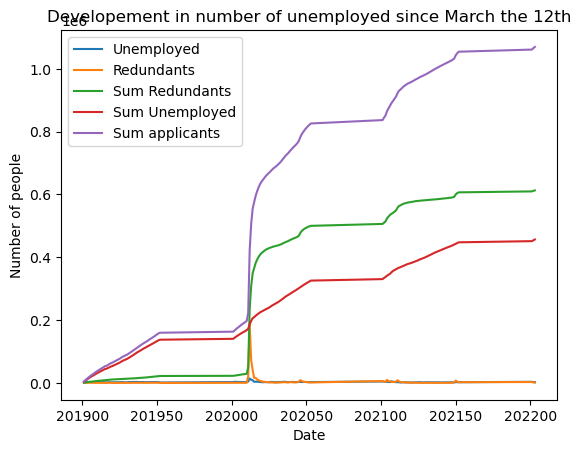

In [114]:
plt.style.use('default')
df_adpm['Unemployed'].plot()
df_adpm['Redundants'].plot()
df_adpm['Sum Redundants'].plot()
df_adpm['Sum Unemployed'].plot()
df_adpm['Sum applicants'].plot()

plt.legend()
plt.ylabel('Number of people')
plt.title('Developement in number of unemployed since March the 12th')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'ledigeCovid.png')
plt.show()

In [115]:
# NAV og ant arbeidsledige
# url = 'https://www.nav.no/no/nav-og-samfunn/statistikk/flere-statistikkomrader/relatert-informasjon/ukentlig-statistikk-over-arbeidsledige/_/attachment/download/301ce315-1ba3-4ac6-b7d2-4b1dedb97e12:932ed3002f295f2749da05ecbea10cb5a3326e6f/1011%20Hovedtall%20om%20arbeidsmarkedet.%20Uke%2046.xlsx'
# df_adpmN = pd.read_excel(url, skiprows=1 , skipfooter=10)

In [116]:
df_adpmN.head()

NameError: name 'df_adpmN' is not defined

In [94]:
#5 boligpris 
df = pd.read_csv('http://data.ssb.no/api/v0/dataset/1060.csv?lang=no', encoding = 'latin1', dtype = object, delimiter = ';')
df.columns = ['region', 'boligtype', 'tid', 'statistikkvariabel', 'prisindeks']
#df['Totalt'] = df['TOTAL Hele landet']

for i in range(len(df['tid'])):
    df['tid'][i] = df['tid'][i][:4] + 'Q' + df['tid'][i][5] #change 'K' to 'Q' in for quarter
    df['prisindeks'][i] = str(df['prisindeks'][i]).replace(',', '.') #change decimalpoint from ',' to '.'
    df['prisindeks'][i] = str(df['prisindeks'][i]).replace('..','NaN') # change '..' to 'NaN'
    if df['prisindeks'][i] == '.' or df['prisindeks'][i] == '0':# find missing values as replace with 'NaN'
        df['prisindeks'][i] = 'NaN'


#reorginaze data in a Series with text variables as multilayered indexes
series = pd.Series(df['prisindeks'].astype(np.float64))#, index = [df[df.columns[i]] for i in range(4)])
series.index = [df[df.columns[i]] for i in range(4)]






In [95]:
# dfbolig =df
df.to_pickle('../dfbolig.pkl')


In [96]:
df[df['boligtype']=="00 Boliger i alt"].sample(20)

,region,boligtype,tid,statistikkvariabel,prisindeks
8852,009 Møre og Romsdal og Vestland uten Bergen,00 Boliger i alt,2000Q3,Prisindeks for brukte boliger,NaN
9882,010 Trøndelag uten Trondheim,00 Boliger i alt,2007Q2,Prisindeks for brukte boliger,66.3
8937,009 Møre og Romsdal og Vestland uten Bergen,00 Boliger i alt,2011Q1,"Prisindeks for brukte boliger, sesongjustert",87
10750,011 Nord-Norge,00 Boliger i alt,1993Q4,Prisindeks for brukte boliger,NaN
4144,004 Trondheim,00 Boliger i alt,2022Q1,Prisindeks for brukte boliger,137.7
3917,004 Trondheim,00 Boliger i alt,1993Q3,"Prisindeks for brukte boliger, sesongjustert",NaN
1143,001 Oslo med Bærum,00 Boliger i alt,2012Q4,"Prisindeks for brukte boliger, sesongjustert",88.1
9990,010 Trøndelag uten Trondheim,00 Boliger i alt,2020Q4,Prisindeks for brukte boliger,116.6
1169,001 Oslo med Bærum,00 Boliger i alt,2016Q1,"Prisindeks for brukte boliger, sesongjustert",106.1
8857,009 Møre og Romsdal og Vestland uten Bergen,00 Boliger i alt,2001Q1,"Prisindeks for brukte boliger, sesongjustert",NaN


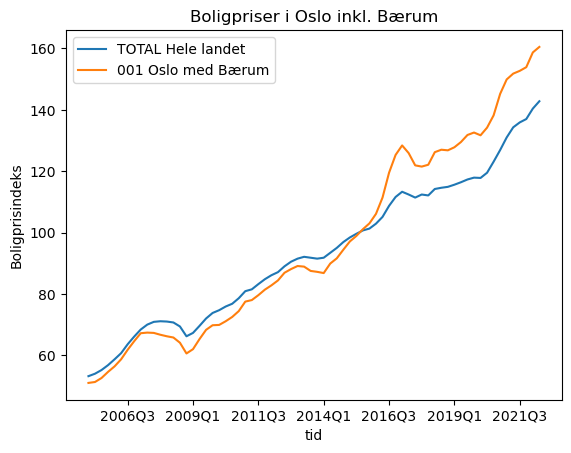

In [97]:

#5.1 boligpris i oslo og bærum
liste = ['TOTAL Hele landet','001 Oslo med Bærum' ]
for i in liste:
    series[i,'00 Boliger i alt',  :, 'Prisindeks for brukte boliger, sesongjustert']['1999Q1':].plot(label = i)
plt.legend()
plt.ylabel('Boligprisindeks')
plt.title('Boligpriser i Oslo inkl. Bærum')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'boligpris oslo og landet.png')




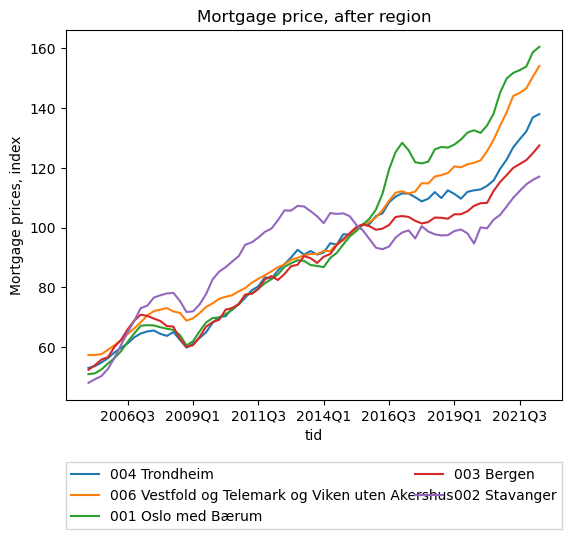

In [98]:
plt.clf()

#5.2 boligprisindeks regioner
# for i in series.index.levels[0][1:-1]:
#     series[i, '00 Boliger i alt', :, 'Prisindeks for brukte boliger, sesongjustert']['1999Q1':].plot(label = i)

liste = ['004 Trondheim', '006 Vestfold og Telemark og Viken uten Akershus', '001 Oslo med Bærum', '003 Bergen', '002 Stavanger']

for i in liste:
    series[i, '00 Boliger i alt', :, 'Prisindeks for brukte boliger, sesongjustert']['2004Q1':].plot(label = i)    
    
    
plt.legend(bbox_to_anchor=(0., -0.35, 1.0, 0.25), loc=4,
           ncol=2, mode="expand", borderaxespad=0., fancybox=False )    
plt.ylabel('Mortgage prices, index')
plt.title('Mortgage price, after region')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'boligprisindeks regioner.png')




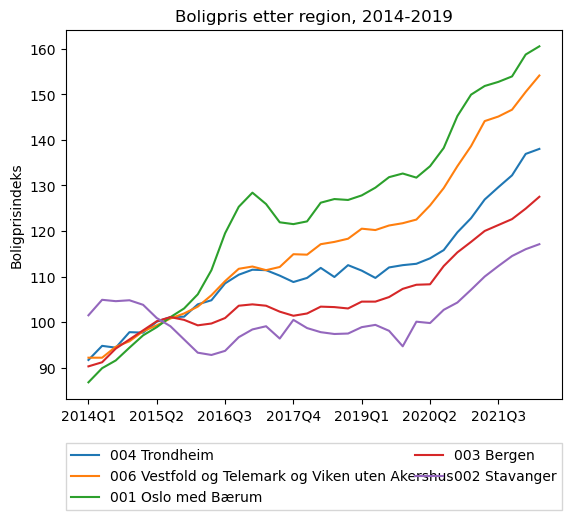

In [99]:

#5.22 boligprisindeks regioner
plt.clf()

liste = ['004 Trondheim', '006 Vestfold og Telemark og Viken uten Akershus', '001 Oslo med Bærum', '003 Bergen', '002 Stavanger']

for i in liste:
    series[i, '00 Boliger i alt', :, 'Prisindeks for brukte boliger, sesongjustert']['2014Q1':].plot(label = i)    
        
#plt.legend()
plt.legend(bbox_to_anchor=(0., -0.3, 1.0, 0.25), loc=4,
           ncol=2, mode="expand", borderaxespad=0., fancybox=False )    
plt.xlabel("")
plt.ylabel('Boligprisindeks')
plt.title('Boligpris etter region, 2014-2019')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'boligprisindeks regioner_.png')
plt.show()

In [100]:
# Olje og gasspriser

url = 'https://www.ssb.no/statbank/sq/10064690'

df = pd.read_excel(url, skiprows=2)
df.drop(columns=['Unnamed: 0', 'Unnamed: 1',], inplace=True)
df.rename(columns={'Unnamed: 2': 'Date'},inplace=True)

In [101]:
df.head()

,Date,Produsentprisindeks (2015=100)
0,2003M08,30.2
1,2003M09,28.0
2,2003M10,28.8
3,2003M11,28.3
4,2003M12,28.2


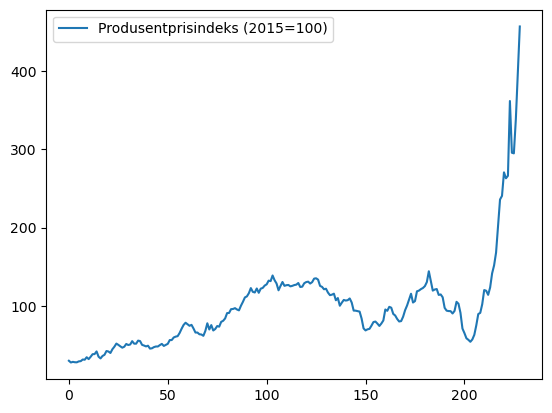

In [102]:
df.plot()
plt.show()


In [109]:
# EUROSTAT-- http://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-406779_QID_42D526A3_UID_-3F171EB0&layout=TIME,C,X,0;GEO,L,Y,0;UNIT,L,Z,0;S_ADJ,L,Z,1;NA_ITEM,L,Z,2;INDICATORS,C,Z,3;&zSelection=DS-406779UNIT,CLV10_MEUR;DS-406779INDICATORS,OBS_FLAG;DS-406779S_ADJ,SCA;DS-406779NA_ITEM,B1GQ;&rankName1=UNIT_1_2_-1_2&rankName2=INDICATORS_1_2_-1_2&rankName3=NA-ITEM_1_2_-1_2&rankName4=S-ADJ_1_2_-1_2&rankName5=TIME_1_0_0_0&rankName6=GEO_1_2_0_1&ppcRK=FIRST&ppcSO=ASC&sortC=ASC_-1_FIRST&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=true&lang=EN&cfo=%23%23%23%2C%23%23%23.%23%23%23
#  Ta ut datasett i excel - ta vare på, chainlinked volume, index=100, season and calender adjusted
# On seperate sheets eller bedre Not "Full extraction"
#http://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-406779_QID_54D3DCA_UID_-3F171EB0&layout=TIME,C,X,0;GEO,L,Y,0;UNIT,L,Z,0;S_ADJ,L,Z,1;NA_ITEM,L,Z,2;INDICATORS,C,Z,3;&zSelection=DS-406779UNIT,CLV10_MEUR;DS-406779INDICATORS,OBS_FLAG;DS-406779S_ADJ,SCA;DS-406779NA_ITEM,B1GQ;&rankName1=UNIT_1_2_-1_2&rankName2=INDICATORS_1_2_-1_2&rankName3=NA-ITEM_1_2_-1_2&rankName4=S-ADJ_1_2_-1_2&rankName5=TIME_1_0_0_0&rankName6=GEO_1_2_0_1&ppcRK=FIRST&ppcSO=ASC&sortC=ASC_-1_FIRST&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=false&lang=EN&cfo=%23%23%23%2C%23%23%23.%23%23%23
euro_df = pd.read_excel(r"C:\Users\jprestmo001\Documents\GitHub\Data\Makro\namq_10_gdp.xlsx", 
                        skiprows=9, na_values=":", skipfooter=3, sheet_name="Data4")

euro_df = euro_df.T

new_header = euro_df.iloc[0] #grab the first row for the header
new_header[0]='Time'
euro_df = euro_df[1:] #take the data less the header row
euro_df.columns = new_header


pd.to_datetime(euro_df['Time'])
euro_df.set_index('Time', inplace=True)


# euro_df["Germany"] = euro_df[]
euro_df.rename({'Euro area - 12 countries (2001-2006)':'Euro area', "Germany (until 1990 former territory of the FRG)": 'Germany'}, axis=1, inplace=True)


euro_df.tail()

Unnamed: 0,European Union - 28 countries (2013-2020),European Union - 15 countries (1995-2004),"Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015)",Euro area - 19 countries (from 2015),Euro area,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey,Bosnia and Herzegovina,Kosovo (under United Nations Security Council Resolution 1244/99),Euro area - 18 countries (2014)
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021Q2,NaN,NaN,110.316,110.316,109.885,113.561,119.895,121.262,119.673,115.167,148.529,210.238,82.694,101.644,109.493,113.871,97.082,115.525,136.195,148.196,127.596,132.609,165.309,114.805,111.256,141.317,102.566,146.251,121.426,124.834,109.515,123.318,NaN,115.856,118.97,NaN,NaN,120.882,NaN,126.72,181.744,NaN,NaN,NaN
2021Q3,NaN,NaN,112.712,112.712,112.303,115.948,121.096,123.322,120.591,116.071,149.684,219.567,84.705,104.804,113.2,115.913,99.737,118.803,137.015,149.289,127.253,134.023,171.413,116.545,115.916,144.995,105.42,142.055,122.951,125.34,110.541,125.327,NaN,120.521,121.107,NaN,NaN,122.892,NaN,128.681,186.678,NaN,NaN,NaN
2021Q4,NaN,NaN,113.26,113.26,112.819,116.442,122.56,124.366,123.862,116.039,150.922,215.497,85.488,107.178,113.781,117.135,100.413,121.344,137.041,150.953,129.441,137.129,176.768,117.349,114.434,147.58,107.463,143.52,129.379,125.834,111.312,126.995,NaN,120.667,121.238,NaN,NaN,123.767,NaN,130.805,189.619,NaN,NaN,NaN
2022Q1,NaN,NaN,114.014,114.014,113.561,117.07,123.676,125.138,123.235,116.965,150.953,228.834,87.944,106.975,113.497,120.392,100.525,123.072,140.101,151.786,130.328,139.651,178.594,117.865,115.945,151.219,110.024,150.826,130.27,126.369,111.886,127.225,NaN,119.64,121.614,NaN,NaN,NaN,NaN,130.034,190.897,NaN,NaN,NaN
2022Q2,NaN,NaN,114.893,114.893,114.458,117.297,124.644,125.703,124.298,117.128,148.929,232.91,89.024,108.536,114.107,122.75,101.666,122.694,140.149,152.301,129.635,141.207,180.088,120.878,118.129,148.017,110.164,153.965,131.454,126.942,112.976,128.369,NaN,120.489,121.942,NaN,NaN,NaN,NaN,131.619,194.848,NaN,NaN,NaN


In [110]:
euro_df.to_pickle('../dfeuro.pkl')
print('Fransk BNP-fall',((527715-560402)/560402*100))

Fransk BNP-fall -5.832777184949375


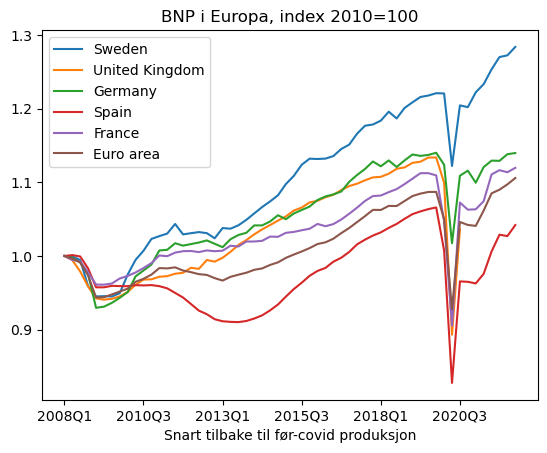

In [112]:

# Figur 6.1  BNP fra Eurostat
plt.clf()

nlastquarter = '2022Q2'

(euro_df['Sweden']['2008Q1':lastquarter]/euro_df['Sweden']['2008Q1']).plot()  # late with NA-data
(euro_df['United Kingdom']['2008Q1':lastquarter]/euro_df['United Kingdom']['2008Q1']).plot()  # late with NA-data
(euro_df['Germany']['2008Q1':lastquarter]/euro_df['Germany']['2008Q1']).plot()  # late with NA-data
(euro_df['Spain']['2008Q1':lastquarter]/euro_df['Spain']['2008Q1']).plot()
(euro_df['France']['2008Q1':lastquarter]/euro_df['France']['2008Q1']).plot()
(euro_df['Euro area']['2008Q1':lastquarter]/euro_df['Euro area']['2008Q1']).plot()

plt.title("BNP i Europa, index 2010=100")
plt.legend()
plt.xlabel('Snart tilbake til før-covid produksjon')
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'BNPEuroOmrådet.png')
plt.show()

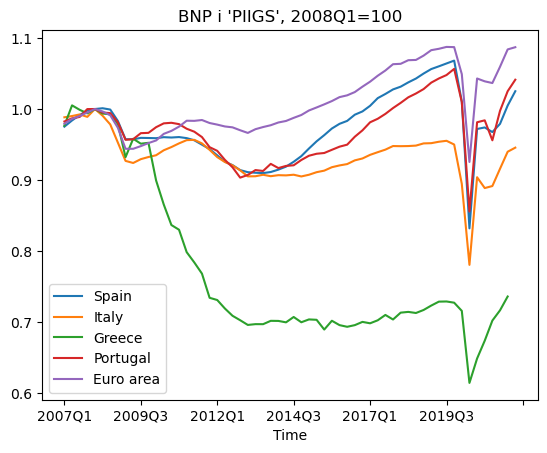

In [238]:

plt.clf()
# FIG 6.2 PIIGS
(euro_df['Spain']['2006Q1':lastquarter]/euro_df['Spain']['2008Q1']).plot()
(euro_df["Italy"]['2006Q1':lastquarter]/euro_df["Italy"]['2008Q1']).plot()
(euro_df["Greece"]['2006Q1':lastquarter]/euro_df["Greece"]['2008Q1']).plot()
(euro_df["Portugal"]['2006Q1':lastquarter]/euro_df["Portugal"]['2008Q1']).plot()
# (euro_df["Ireland"]['2006Q1':lastquarter]/euro_df["Ireland"]['2008Q1']).plot()
(euro_df['Euro area']['2006Q1':lastquarter]/euro_df['Euro area']['2008Q1']).plot()

plt.title("BNP i 'PIIGS', 2008Q1=100")
plt.legend()
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'BNPPIIGS.png')
plt.show()
# PIIGS - opprinnelig uten italia, men ser at det er den første I'en som går bra og Italia er fortsatt ikke over 2008-nivå, 
# Irland går derimot helt fantastisk - GAFA har boosted BNP??

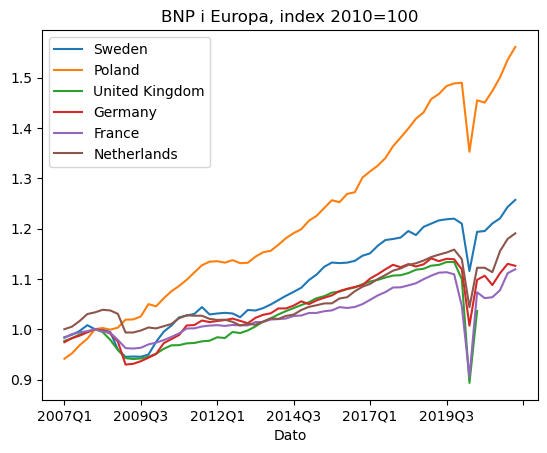

<Figure size 640x480 with 0 Axes>

In [236]:

plt.clf()
(euro_df['Sweden']['2007Q1':lastquarter]/euro_df['Sweden']['2008Q1']).plot()
(euro_df['Poland']['2007Q1':lastquarter]/euro_df['Poland']['2008Q1']).plot()
(euro_df['United Kingdom']['2007Q1':lastquarter]/euro_df['United Kingdom']['2008Q1']).plot()
(euro_df['Germany']['2007Q1':lastquarter]/euro_df['Germany']['2008Q1']).plot()
(euro_df['France']['2007Q1':lastquarter]/euro_df['France']['2008Q1']).plot()
(euro_df['Netherlands']['2007Q1':lastquarter]/euro_df['Netherlands']['2007Q1']).plot()
plt.title("BNP i Europa, index 2010=100")

plt.legend()
plt.xlabel('Dato')
plt.show()
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'BNPeuroområdet.png')

In [116]:
# Unemployment

# http://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-055624_QID_2DC4BB93_UID_-3F171EB0&layout=TIME,C,X,0;GEO,L,Y,0;S_ADJ,L,Z,0;AGE,L,Z,1;UNIT,L,Z,2;SEX,L,Z,3;INDICATORS,C,Z,4;&zSelection=DS-055624SEX,T;DS-055624UNIT,PC_ACT;DS-055624S_ADJ,SA;DS-055624AGE,TOTAL;DS-055624INDICATORS,OBS_FLAG;&rankName1=UNIT_1_2_-1_2&rankName2=AGE_1_2_-1_2&rankName3=INDICATORS_1_2_-1_2&rankName4=SEX_1_2_-1_2&rankName5=S-ADJ_1_2_-1_2&rankName6=TIME_1_0_0_0&rankName7=GEO_1_2_0_1&sortC=ASC_-1_FIRST&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=false&lang=EN&cfo=%23%23%23%2C%23%23%23.%23%23%23

# euroU_df = pd.read_csv(r'C:\Users\i235jbp\Documents\GitHub\une_rt_m.xls',na_values = ':',)
euroU_df = pd.read_excel(r'C:\Users\jprestmo001\Documents\GitHub\Data\Makro\une_rt_m.xlsx', 
                         skiprows=10, skipfooter =3, na_values = ':',sheet_name="Data4")
euroU_df = euroU_df.T
header = euroU_df.iloc[0]
header[0]='TIME'
header[11] = 'Germany'
header[2] = "Euro19"

euroU_df = euroU_df[1:]
euroU_df.columns = header
# pd.to_datetime(euroU_df['TIME'])
euroU_df.set_index('TIME', inplace=True)


# euroU_df = euroU_df[euroU_df["S_ADJ"]=="Seasonally adjusted data, not calendar adjusted data"]
# euroU_df = euroU_df[euroU_df["UNIT"]=="Percentage of active population"]
# #dfses.drop('statistikkvariabel',1, inplace=True)
# euroU_df.drop(["UNIT","S_ADJ", "TIME", "SEX", "AGE"], 1, inplace=True)
# #dfses = dfses.pivot(index = 'kvartal', columns = 'makrostørrelse', values = 'Makroøkonomiske hovedstørrelser, etter makrostørrelse, kvartal og statistikkvariabel')
# euroU_df['Value'] = euroU_df['Value'].astype('float64')
# euroU_df = euroU_df.pivot(columns = 'GEO', values="Value")

euroU_df.head()


Unnamed: 0,Euro area - 19 countries (from 2015),Euro19,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,Germany,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Norway,United Kingdom,Turkey,United States,Japan,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015)",Euro area - 18 countries (2014),European Union - 25 countries (2004-2006),EU27,European Union - 28 countries (2013-2020)
TIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005M01,9.3,8.3,11.2,8.2,5.3,10.7,9.2,4.4,10.2,10.1,8.7,13.6,7.8,4.9,11.5,9.8,4.7,6.6,6.7,7,5.7,18.1,8.8,7.8,6.4,17.3,9.3,7,3.1,4.5,4.7,9.3,5.3,4.5,NaN,NaN,NaN,NaN,NaN
2005M02,9.2,8.5,10.9,8.3,5.2,10.9,9.3,4.3,9.8,9.9,8.6,13.6,8,5,11.1,9.5,4.8,6.8,6.9,7.2,5.5,18.2,8.8,7.9,6.5,17.1,8.9,7.8,3,4.4,4.6,9.1,5.4,4.6,NaN,NaN,NaN,NaN,NaN
2005M03,9.2,8.6,10.6,7.9,5.2,10.9,8.6,4.6,10.2,9.7,8.6,13.5,7.9,5.2,10.7,9.3,4.7,6.9,7.2,7.1,6.1,18.3,9,7.9,6.4,17,7.9,7.3,3,4.6,4.6,9.3,5.2,4.5,NaN,NaN,NaN,NaN,NaN
2005M04,9.3,8.4,10.4,8,5.2,11.2,8.3,4.8,9.9,9.7,8.7,13.3,7.9,5.4,10.2,9.3,4.7,7.1,7.4,7.1,6,18.4,9.1,7.2,6.1,16.7,8.9,7.7,2.9,4.6,4.7,9.5,5.2,4.5,NaN,NaN,NaN,NaN,NaN
2005M05,9.3,8.6,10.1,8.1,5,11.2,8,4.9,9.9,9.4,8.8,13.2,7.6,5.8,10,9,4.7,7.2,7.3,7.2,6.2,18.4,9.1,7.4,6,16.6,8.1,8.3,2.9,4.6,4.7,9.7,5.1,4.5,NaN,NaN,NaN,NaN,NaN


In [119]:
euroU_df.tail()

Unnamed: 0,Euro area - 19 countries (from 2015),Euro19,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,Germany,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Norway,United Kingdom,Turkey,United States,Japan,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015)",Euro area - 18 countries (2014),European Union - 25 countries (2004-2006),EU27,European Union - 28 countries (2013-2020)
TIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022M04,6.7,5.6,4.5,2.5,4.1,3,5.5,4.5,12.8,12.9,7.5,6.3,8.2,6.9,6.6,5.4,4.3,3.3,3,3.2,4.4,2.7,5.9,5.5,4.4,6.3,6.2,7.7,4,2.7,NaN,NaN,3.6,2.5,NaN,NaN,NaN,NaN,NaN
2022M05,6.7,5.8,4.5,2.5,4.1,3,5.8,4.2,12.7,12.6,7.6,6.2,8,7,6.5,5.4,4.2,3.5,3,3.3,4.7,2.7,6,5.5,4.5,6.2,6.1,7.7,4,3.8,NaN,NaN,3.6,2.6,NaN,NaN,NaN,NaN,NaN
2022M06,6.7,5.9,4.5,2.4,4.3,3,5.8,4.3,12.4,12.5,7.6,6.3,8,7.5,6.4,5.4,4.2,3.1,2.9,3.4,4.2,2.7,6,5.4,4.4,6.1,6.8,7.6,4.1,3,NaN,NaN,3.6,2.6,NaN,NaN,NaN,NaN,NaN
2022M07,6.6,5.9,4.6,2.4,4.6,3,5.8,4.2,12.3,12.4,7.4,6.4,7.9,8.2,6.5,5.2,4.3,3.5,2.9,3.6,4.6,2.6,6,5.2,4.2,6.1,7.2,7,4.2,2.8,NaN,NaN,3.5,2.6,NaN,NaN,NaN,NaN,NaN
2022M08,6.6,5.8,4.6,2.4,4.4,3,5.8,4.3,12.2,12.4,7.3,6.4,7.8,8.6,6.5,5.2,4.4,3.5,2.9,3.8,5.2,2.6,6,5.1,4.1,6,7.3,6.9,4.3,3.5,NaN,NaN,3.7,2.5,NaN,NaN,NaN,NaN,NaN


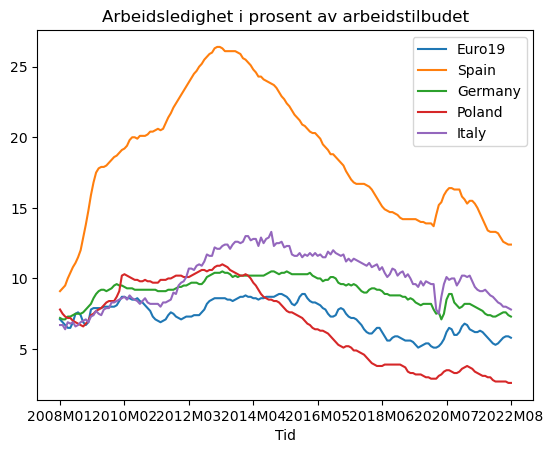

In [120]:
plt.clf()
euroU_df['Euro19']['2007Q1':].plot()
euroU_df["Spain"]["2007Q1":].plot()
euroU_df["Germany"]["2007Q1":].plot()
# euroU_df["France"]["2007Q1":].plot()
# euroU_df["United Kingdom"]["2007Q1":].plot()
euroU_df["Poland"]["2007Q1":].plot()
euroU_df["Italy"]["2007Q1":].plot()
plt.title("Arbeidsledighet i prosent av arbeidstilbudet")
plt.legend()
plt.xlabel("Tid")
figfolder = 'Figures/Makro/'
plt.savefig(figfolder +'/ledighetEuro.png')
plt.show()

In [121]:
# US renter 
# # Treasury bills
# fsb_url = "https://www.federalreserve.gov/datadownload/Output.aspx?rel=H15&series=efc162fd6c9e30df971fc84ad58a07dd&lastobs=100&from=&to=&filetype=spreadsheetml&label=include&layout=seriescolumn"
# # 3-Month London Interbank Offered Rate (LIBOR), based on U.S. Dollar 
# fred_url = 'https://fred.stlouisfed.org/graph/fredgraph.xls?chart_type=line&recession_bars=on&log_scales=&bgcolor=%23e1e9f0&graph_bgcolor=%23ffffff&fo=Open+Sans&ts=12&tts=12&txtcolor=%23444444&show_legend=yes&show_axis_titles=yes&drp=0&cosd=2013-03-29&coed=2018-03-28&height=450&stacking=&range=Custom&mode=fred&id=USD3MTD156N&transformation=lin&nd=1986-01-02&ost=-99999&oet=99999&lsv=&lev=&mma=0&fml=a&fgst=lin&fgsnd=2009-06-01&fq=Daily&fam=avg&vintage_date=&revision_date=&line_color=%234572a7&line_style=solid&lw=2&scale=left&mark_type=none&mw=2&width=1168'
                        
# fsb_df = pd.read_excel("C:/Users/i235jbp/Documents/GitHub/FRB_3mnd10år_2019februar.xlsx", header = None, skiprows=7, missing = "ND")
fsb_df = pd.read_excel("C:/Users/i235jbp/Documents/GitHub/Data/Makro/FRB_H15.xlsx", header = None, skiprows=7, na_values = "ND")

fsb_df.columns = ["Dato",'12mnth action rate','composite yield 10 yrs' ,'3mnth auction bill rate', "LIBOR","T-bill" ,"T-bill-1year","Treasury3year","Treasury10year"]
pd.to_datetime(fsb_df['Dato'])
fsb_df.index = fsb_df.Dato
#fsb_df.drop("Dato", inplace=True)





FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/i235jbp/Documents/GitHub/Data/Makro/FRB_H15.xlsx'

In [219]:
fsb_df.tail()


,Dato,12mnth action rate,composite yield 10 yrs,3mnth auction bill rate,LIBOR,T-bill,T-bill-1year,Treasury3year,Treasury10year
Dato,,,,,,,,,
2019-12,2019-12,NaN,NaN,NaN,NaN,1.54,1.51,1.63,1.86
2020-01,2020-01,NaN,NaN,NaN,NaN,1.52,1.49,1.52,1.76
2020-02,2020-02,NaN,NaN,NaN,NaN,1.52,1.37,1.31,1.50
2020-03,2020-03,NaN,NaN,NaN,NaN,0.29,0.32,0.50,0.87
2020-04,2020-04,NaN,NaN,NaN,NaN,0.14,0.18,0.28,0.66


In [127]:
# Figur 7.1 - US renter
plt.clf()
#fsb_df["LIBOR"].plot()
fsb_df["T-bill"].plot(label="3mnd T-bill")
# fsb_df["LIBOR"].plot(label="LIBOR")
fsb_df["Treasury3year"].plot(label="Treasury securities 3 år")
fsb_df["Treasury10year"].plot(label="Treasury securities 10 år")
plt.title("Renter, US dollar")
plt.legend()
plt.savefig('../Figurer/Makro/7.1 US renter.png')


NameError: name 'fsb_df' is not defined

<Figure size 640x480 with 0 Axes>

In [220]:
pd.to_datetime(fsb_df['Dato'])
fsb_df['Dato'] = fsb_df['Dato'].datetime.strptime("%Y-%m").strftime("%Y-%m-%d")
fsb_df['2014-02-07':].head()
# fsb_df.tail()

AttributeError: 'Series' object has no attribute 'datetime'

In [ ]:
fsb_df.to_pickle('../dffsb.pkl')


In [130]:

# fred_url = 'https://fred.stlouisfed.org/graph/fredgraph.xls?chart_type=line&recession_bars=on&log_scales=&bgcolor=%23e1e9f0&graph_bgcolor=%23ffffff&fo=Open+Sans&ts=12&tts=12&txtcolor=%23444444&show_legend=yes&show_axis_titles=yes&drp=0&cosd=2013-03-29&coed=2018-03-28&height=450&stacking=&range=Custom&mode=fred&id=USD3MTD156N&transformation=lin&nd=1986-01-02&ost=-99999&oet=99999&lsv=&lev=&mma=0&fml=a&fgst=lin&fgsnd=2009-06-01&fq=Daily&fam=avg&vintage_date=&revision_date=&line_color=%234572a7&line_style=solid&lw=2&scale=left&mark_type=none&mw=2&width=1168'
                        
# fred_df = pd.read_excel(fred_url,  skiprows=10, na_values = "#I/T")
#fred_df = pd.read_excel('G:\Analyse\Makro\Regneark\USD3MTD156N.xls', skiprows=10)
fred_df = pd.read_excel('C:/Users/i235jbp/Documents/GitHub/USD3MTD156N.xls', skiprows=10)
fred_df.columns = ["Dato", "LIBOR"]


fred_df.ffill() # får ikke denne til å fungere
fred_df.index = fred_df.Dato

fred_df.dropna(inplace=True)

# for å ta bort nullere som oppstår pga bank holidays
# fred_df=fred_df[fred_df>0.0]

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/i235jbp/Documents/GitHub/USD3MTD156N.xls'

In [224]:
fred_df.tail()

,Dato,LIBOR
Dato,,
2019-02-01,2019-02-01,2.73263
2019-02-04,2019-02-04,2.73438
2019-02-05,2019-02-05,2.73850
2019-02-06,2019-02-06,2.73763
2019-02-07,2019-02-07,2.69700


In [ ]:
fred_df_m = pd.read_excel('C:/Users/i235jbp/Documents/GitHub/USD3MTD156NM.xls', skiprows=10)
fred_df_m.columns = ["Dato", "LIBOR"]

pd.to_datetime(fred_df_m['Dato'])
fred_df_m.index = fred_df_m.Dato

fred_df_m.head()

In [ ]:
# Figur 8.1 - US renter
plt.clf()
#fsb_df["LIBOR"].plot()
fred_df["LIBOR"].plot(label="Eurodollar libor")
#fsb_df["T-bill-1year"].plot(label="1år T-bill")
#fred_df["Treasury3year"].plot(label="Treasure securities 3 år")
plt.title("LIBOR, Eurodollar")
plt.legend()
plt.savefig('../Figurer/Makro/8.1 Eurodollar LIBOR.png')
    
# fred_df['LIBOR']['2017-12-24':'2017-12-31'].plot()
plt.show()


In [ ]:

# result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
fred_df_m.head()
fsb_df.head()
# nibor_df.head()
# nok_df.head()
# valuta_df.head()
# fsb_df.drop('LIBOR', axis=1, inplace=True)
# renter_df = pd.concat([fred_df, nibor_df, valuta_df], axis=1, join_axes=[fred_df.index])
renter_df = pd.concat([fred_df, valuta], axis=1, join_axes=[fred_df.index])


renter_df.head(8)

In [ ]:
renter_df["LIBOR"].plot(label="Eurodollar libor")
renter_df["T-bill"].plot(label="3mnd T-bill")
#fred_df["Treasury3year"].plot(label="Treasure securities 3 år")
plt.title("LIBOR, Eurodollar og T-bills")
plt.legend()
plt.savefig('8.2 Tbill LIBOR.png')
    
# fred_df['LIBOR']['2017-12-24':'2017-12-31'].plot()
plt.show()


In [ ]:
# Figur 9.1 norske renter og libor
# plt.clf()
# renter_df['LIBOR'].plot()
# renter_df['NIBOR 3M'].plot()
# renter_df['1 USD'].plot(secondary_y=True)
# plt.title("Renter, NOK/USD, 3M NIBOR og LIBOR")
# plt.legend()


# plt.savefig('renteparitet.png')

# fig, ax1 = plt.subplots()

# ax2 = ax1.twinx()
# ax1.plot(renter_df['dato'], renter_df['LIBOR'], 'g-')
# ax2.plot(renter_df['dato'], renter_df['1 USD'] )

# ax1.set_xlabel('X data')
# ax1.set_ylabel('Y1 data', color='g')
# ax2.set_ylabel('Y2 data', color='b')

# plt.show()



In [ ]:
# DEV:

# US - contribution to to growth in GDP 
# Net export: https://fred.stlouisfed.org/series/A019RY2Q224SBEA
# Consumption: https://fred.stlouisfed.org/graph/?g=mZP4
# Public consumption: https://fred.stlouisfed.org/graph/?g=mZP7
# Investment: Gross private inventories: https://fred.stlouisfed.org/graph/?g=mZP9
# Investments: Gross private investments: https://fred.stlouisfed.org/graph/?g=mZPb
# Contributions to percent change in real gross domestic product: Gross private domestic investment: Fixed investment: https://fred.stlouisfed.org/graph/?g=mZPd



In [ ]:
# US savings

# fred_url = 
                        
# fred_df = pd.read_excel(fred_url,  skiprows=10, na_values = "#I/T")
#fred_df = pd.read_excel('G:\Analyse\Makro\Regneark\USD3MTD156N.xls', skiprows=10)
fred_df_s = pd.read_excel('C:/Users/i235jbp/Documents/GitHub/Data/Makro/A072RC1Q156SBEA.xls', skiprows=10)
fred_df_s.columns = ["Dato", "US savings"]
fred_df_s.index = fred_df_s.Dato



In [ ]:
fred_df_s.head()

In [ ]:
# Figur 10.1 - US savings
plt.clf()
fred_df_s["US savings"].plot(label="Sparerate, USA husholdninger")
#fsb_df["T-bill-1year"].plot(label="1år T-bill")
#fred_df["Treasury3year"].plot(label="Treasure securities 3 år")
plt.title("Sparerate i USA, husholdninger")
# plt.legend()
plt.savefig('../Figurer/Makro/10.1 US savings.png')
    
plt.show()


In [ ]:
# US debt to GDP

fred_df_debt = pd.read_excel('C:/Users/i235jbp/Documents/GitHub/Data/Makro/GFDEGDQ188S.xls', skiprows=10)
fred_df_debt.columns = ["Dato", "USDebtToGDP"]
fred_df_debt.index = fred_df_debt.Dato
fred_df_debt.head()

In [ ]:
# Figur 10.2 - US debt to gdp
plt.clf()
fred_df_debt["USDebtToGDP"].plot(label="Sparerate, USA husholdninger")
#fsb_df["T-bill-1year"].plot(label="1år T-bill")
#fred_df["Treasury3year"].plot(label="Treasure securities 3 år")
plt.title("Gjedsgrad i USA, offentlig")
# plt.legend()
plt.savefig('../Figurer/Makro/10.2 US debtratio.png')
    
plt.show()


In [229]:
#  https://www.nve.no/energiforsyning/kraftmarkedsdata-og-analyser/magasinstatistikk/
el_df = pd.read_excel('C:/Users/i235jbp/Documents/GitHub/Data/Makro/Fyllingsgrad.xlsx', skiprows=2)
# fred_df_debt.columns = ["Dato", "USDebtToGDP"]
# fred_df_debt.index = fred_df_debt.Dato
# fred_df_debt.head()


In [230]:
el_df.head()

,Iso_uke,Nåværende år,Min,Median,Maks,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,0.640810,0.426842,0.679188,0.787623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.624639,NaN,NaN
1,2,0.639191,0.404336,0.656149,0.755858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605142,NaN,NaN
2,3,0.627861,0.386367,0.629205,0.725133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.575437,NaN,NaN
3,4,0.621983,0.363698,0.597440,0.692209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.539403,NaN,NaN
4,5,0.604162,0.346099,0.567435,0.671378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.504785,NaN,NaN


In [ ]:
# merge year and week column
# el_df['period'] = el_df[['År', 'Uke']].apply(lambda x: ''.join(x), axis=1)
# pd.MultiIndex.from_frame(el_df)
pd.__version__

In [ ]:
# el_df['Hele landet'].plt()
# plt.show()


In [ ]:
df = pd.DataFrame([[11, 22], [13, 23]], columns=['sub_1', 'sub_2'])

# First plot single-header dataframe (headers = ['sub_1', 'sub_2'])
plt.table(cellText=df.round(4).values, cellLoc='center', bbox=[0.225, 1, 0.7, 0.15],
    rowLabels=['  {}  '.format(i) for i in df.index], rowLoc='center',
    rowColours=['silver']*len(df.index), colLabels=df.columns, colLoc='center',
    colColours=['lightgrey']*len(df.columns), colWidths=[0.1]*len(df.columns))

# Then plot a new table with one cell (value = 'main')
plt.table(cellText=[['main']], cellLoc='center', bbox=[0.225, 1.15, 0.7, 0.05],
    cellColours=[['Lavender']])

In [263]:
import requests
import json
import prettytable
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0','SUUR0000SA0'],"startyear":"2011", "endyear":"2014"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()

In [ ]:
# US inflation

url = 'https://data.bls.gov/images/buttons/download_button_xlsx'

pd

### Make tree plot using plotly 

In [19]:

import plotly.figure_factory as ff
import plotly


import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import IPython.display
from IPython.display import display, clear_output


# plotly.plotly.iplot()

In [26]:
# To-do replace gapminder data with data for gross product for indust
import plotly.express as px
import numpy as np

df = px.data.gapminder().query("year == 2007")
fig = px.treemap(df, path=[px.Constant("world"), 'continent'], values='pop'#  , 'country',
                  # color='lifeExp', hover_data=['iso_alpha'],
                  # color_continuous_scale='RdBu',
                  # color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop'])
                )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
# fig.show()
fig.write_html("folder+plotlyfig.html")

In [4]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


NameError: name 'folder' is not defined